In [1]:
import numpy as np
import pyemma
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [2]:
import sys

sys.path.insert(1, "/project2/dinner/DGA_Spencer/")
import DGA

# Load data 

3.2.21

In [8]:
# amber files
with np.load("../data/feat3_raw_amber.npz") as f:
    feat3_amber_trajs = f["arr_0"]

In [9]:
print(feat3_amber_trajs.shape)
print(feat3_anton_trajs.shape)

(1000, 3000, 60)
(3580000, 60)


In [12]:
feat3_amber_arr = np.vstack(feat3_amber_trajs)
print(feat3_amber_arr.shape)
feat3_arr = np.concatenate((feat3_amber_arr, feat3_anton_trajs))
print(feat3_arr.shape)

(3000000, 60)
(6580000, 60)


In [13]:
# save all feat 3 as a single file for easy loading
np.savez_compressed("../data/feat3_raw.npz", feat3_arr)

Load distance and spin CVs

In [6]:
with np.load("../../data/raw_feat/cv_dist_spin.npz") as data:
    ds_amber = data["arr_0"]
print(ds_amber.shape)

(6580000, 2)


In [7]:
ds_amber_arr = np.vstack(ds_amber)

In [27]:
# load anton distance/rotation CVs
ds_anton_files = sorted(glob.glob("../data/projection_anton/*"))
print(ds_anton_files[:10])

['../data/projection_anton/civsd-000.txt', '../data/projection_anton/civsd-001.txt', '../data/projection_anton/civsd-002.txt', '../data/projection_anton/civsd-003.txt', '../data/projection_anton/civsd-004.txt', '../data/projection_anton/civsd-005.txt', '../data/projection_anton/civsd-006.txt', '../data/projection_anton/civsd-007.txt', '../data/projection_anton/civsd-008.txt', '../data/projection_anton/civsd-009.txt']


In [31]:
data0 = np.loadtxt(ds_anton_files[0])
data0[1:-1].shape

(10000, 2)

In [32]:
ds_arr = ds_amber_arr
for i, file in enumerate(ds_anton_files):
    data = np.loadtxt(file)
    ds_arr = np.concatenate((ds_arr, data[1:-1]))

In [33]:
print(ds_arr.shape)

(6580000, 2)


In [34]:
np.savez_compressed("../data/cv_dist_spin.npz", ds_arr)

## Reload salt bridge features (feat3) since not sorted in correct order

In [26]:
feat = pyemma.coordinates.featurizer("../civsd-pro.pdb")
pair_indices = np.loadtxt("../data/feat3_atom_indices.txt", dtype=np.int32)
feat.add_distances(pair_indices)

In [36]:
xtcs = []
for i in range(0, 1000):
    xtcs.append(f"../amber/xtc300ns/civsd_{i}_300ns.xtc")
for i in range(0, 295):
    xtcs.append(f"../anton/xtc1000ns/civsd-{i}.xtc")
print(len(xtcs))

1295


In [38]:
feat3_raw = pyemma.coordinates.load(xtcs, features=feat, chunksize=32)

In [40]:
print(np.asarray(feat3_raw[1200]).shape)
np.savez_compressed("../data/feat3_raw.npz", feat3_raw)

(3000, 60)


In [41]:
print(feat3_raw[1200].shape)

(10000, 60)


In [43]:
with np.load("../data/feat3_raw.npz", allow_pickle=True) as data:
    feat3_trajs = data["arr_0"]
feat3_trajs.shape

(1295,)

In [44]:
feat3_trajs[0].shape

(3000, 60)

In [45]:
type(feat3_trajs)

numpy.ndarray

In [46]:
type(feat3_trajs[0])

numpy.ndarray

In [48]:
feat3_arr = np.concatenate(feat3_trajs, axis=0)

In [49]:
feat3_arr.shape

(6580000, 60)

## Feature 3 analysis

60 features, 30 (6 arginines CA times 5 aspartate CA, and then for ARG Cz to ASP Cg)

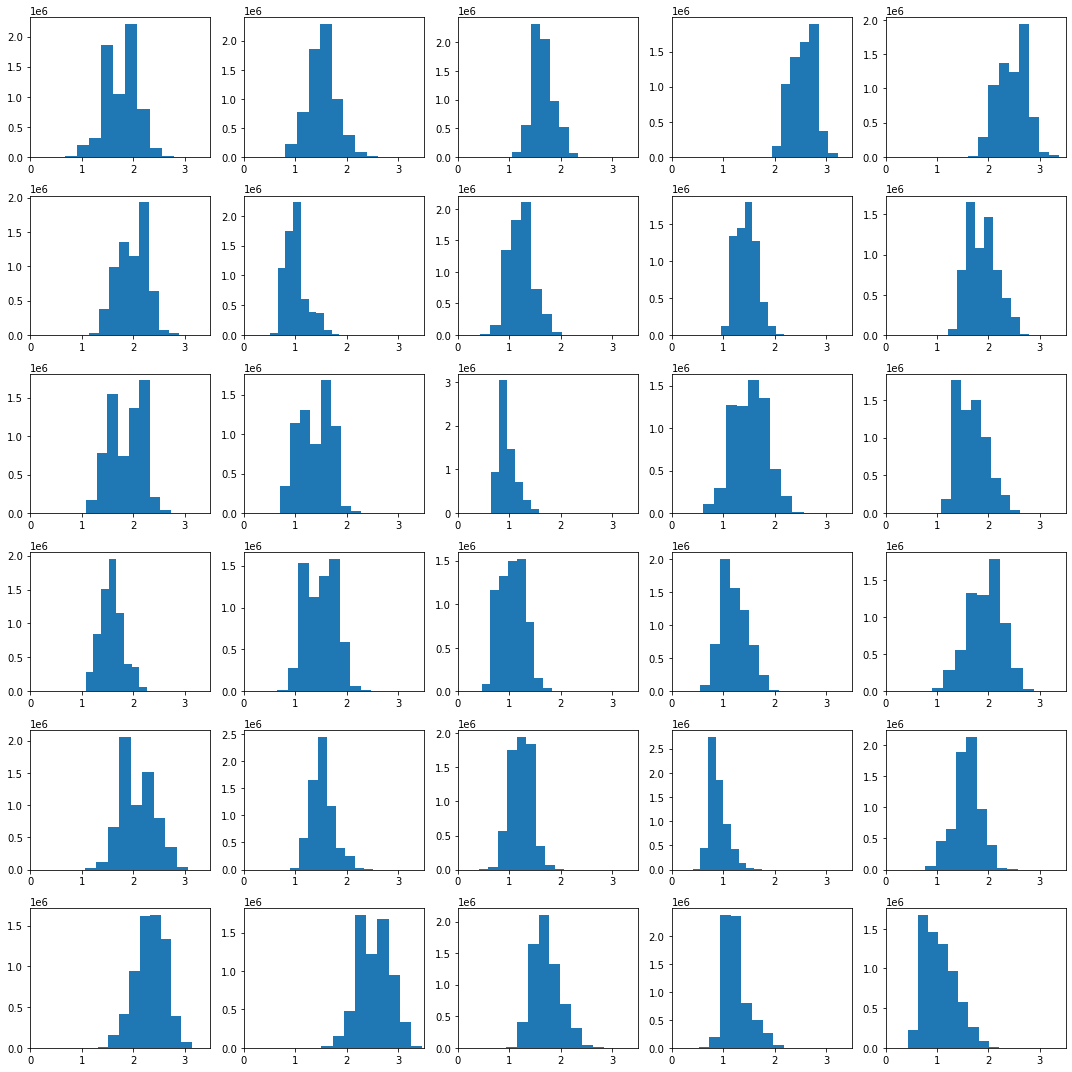

In [23]:
# plot histograms (each row is ith arginine, each column is jth aspartate)
f, axs = plt.subplots(6, 5, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    ax.hist(feat3_arr[:, i])
    ax.set(xlim=[0, 3.5])
# f.set_title(f'Distance between 1st Arg CA to each Asp Ca')
f.tight_layout()

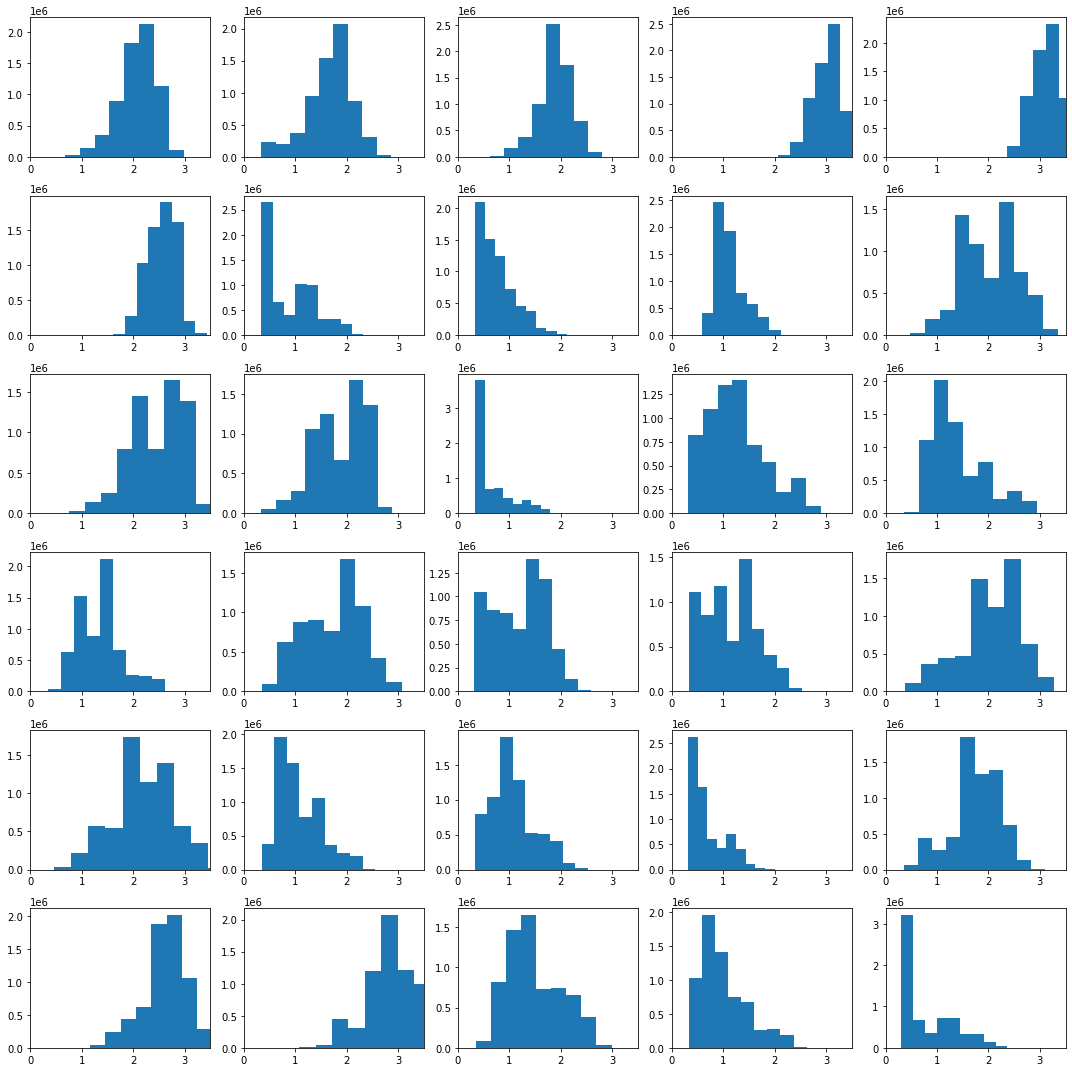

In [24]:
# plot histograms (each row is ith arginine, each column is jth aspartate) terminal carbons
f, axs = plt.subplots(6, 5, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    ax.hist(feat3_arr[:, i + 30])
    ax.set(xlim=[0, 3.5])

f.tight_layout()

## CV analysis 

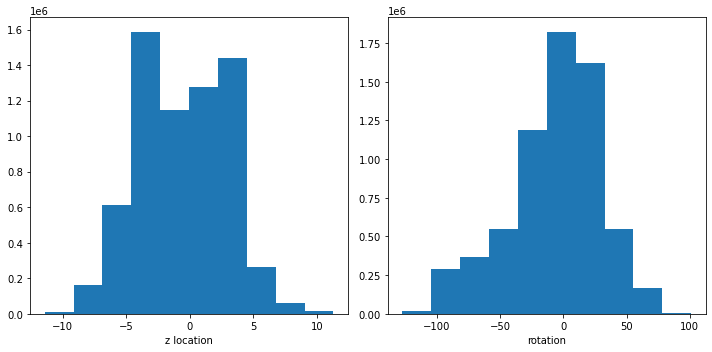

In [50]:
# histograms
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(ds_arr[:, 0])
ax1.hist(ds_arr[:, 1])
ax0.set(xlabel="z location")
ax1.set(xlabel="rotation")
f.tight_layout()

(-150.0, 100.0)

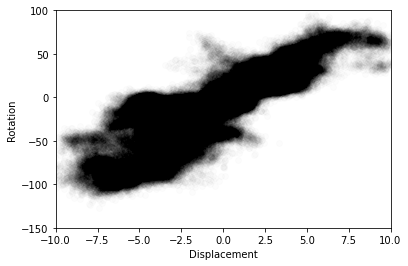

In [53]:
disp_arr = ds_arr[::30, 0]
rot_arr = ds_arr[::30, 1]
f, ax = plt.subplots()
ax.scatter(disp_arr, rot_arr, alpha=0.01, color="k")
ax.set(xlabel="Displacement", ylabel="Rotation")
ax.set_xlim([-10, 10])
ax.set_ylim([-150, 100])

# Trajectories in CV space - what are the bounds for up and down states? 

3.8.21

## Make into lists of np arrays for trajectories 

In [5]:
with np.load("../data/cv_dist_spin.npz") as data:
    ds_arr = data["arr_0"]
print(ds_arr.shape)

(6580000, 2)


In [ ]:
ds_traj = []
for i in range(1000):
    start = i * 3000
    end = (i + 1) * 3000
    ds_traj.append(ds_arr[start:end])

# Anton trajectories 179 - 185 are 100000 frames
for i in range(254):
    if i < 179:
        start = 6000000 + i * 100000
        end = start + 100000
    elif 179 <= i <= 185:
        start = 6000000
    ds_traj.append(dsarr[start:end])

In [6]:
cv_files_amber = sorted(
    glob.glob("../amber-gpu/msm-projection-300ns/TRANSFORM_2D_npy/*")
)
print(len(cv_files_amber))

1000


In [9]:
cv_trajs = []
for i, file in enumerate(cv_files_amber):
    data = np.load(file)
    cv_trajs.append(data)

In [10]:
ds_anton_files = sorted(glob.glob("../data/projection_anton/*"))

In [11]:
for i, file in enumerate(ds_anton_files):
    data = np.loadtxt(file)
    cv_trajs.append(data)

In [12]:
len(cv_trajs)

1295

In [4]:
sys.path.insert(1, "../python")
import util

In [33]:
import importlib

importlib.reload(util)

<module 'util' from '../python/util.py'>

In [9]:
cv_trajs = util.load_ds_trajs()

In [10]:
len(cv_trajs)

1295

## Plot some trajectories in CV space 

In [18]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use("default")

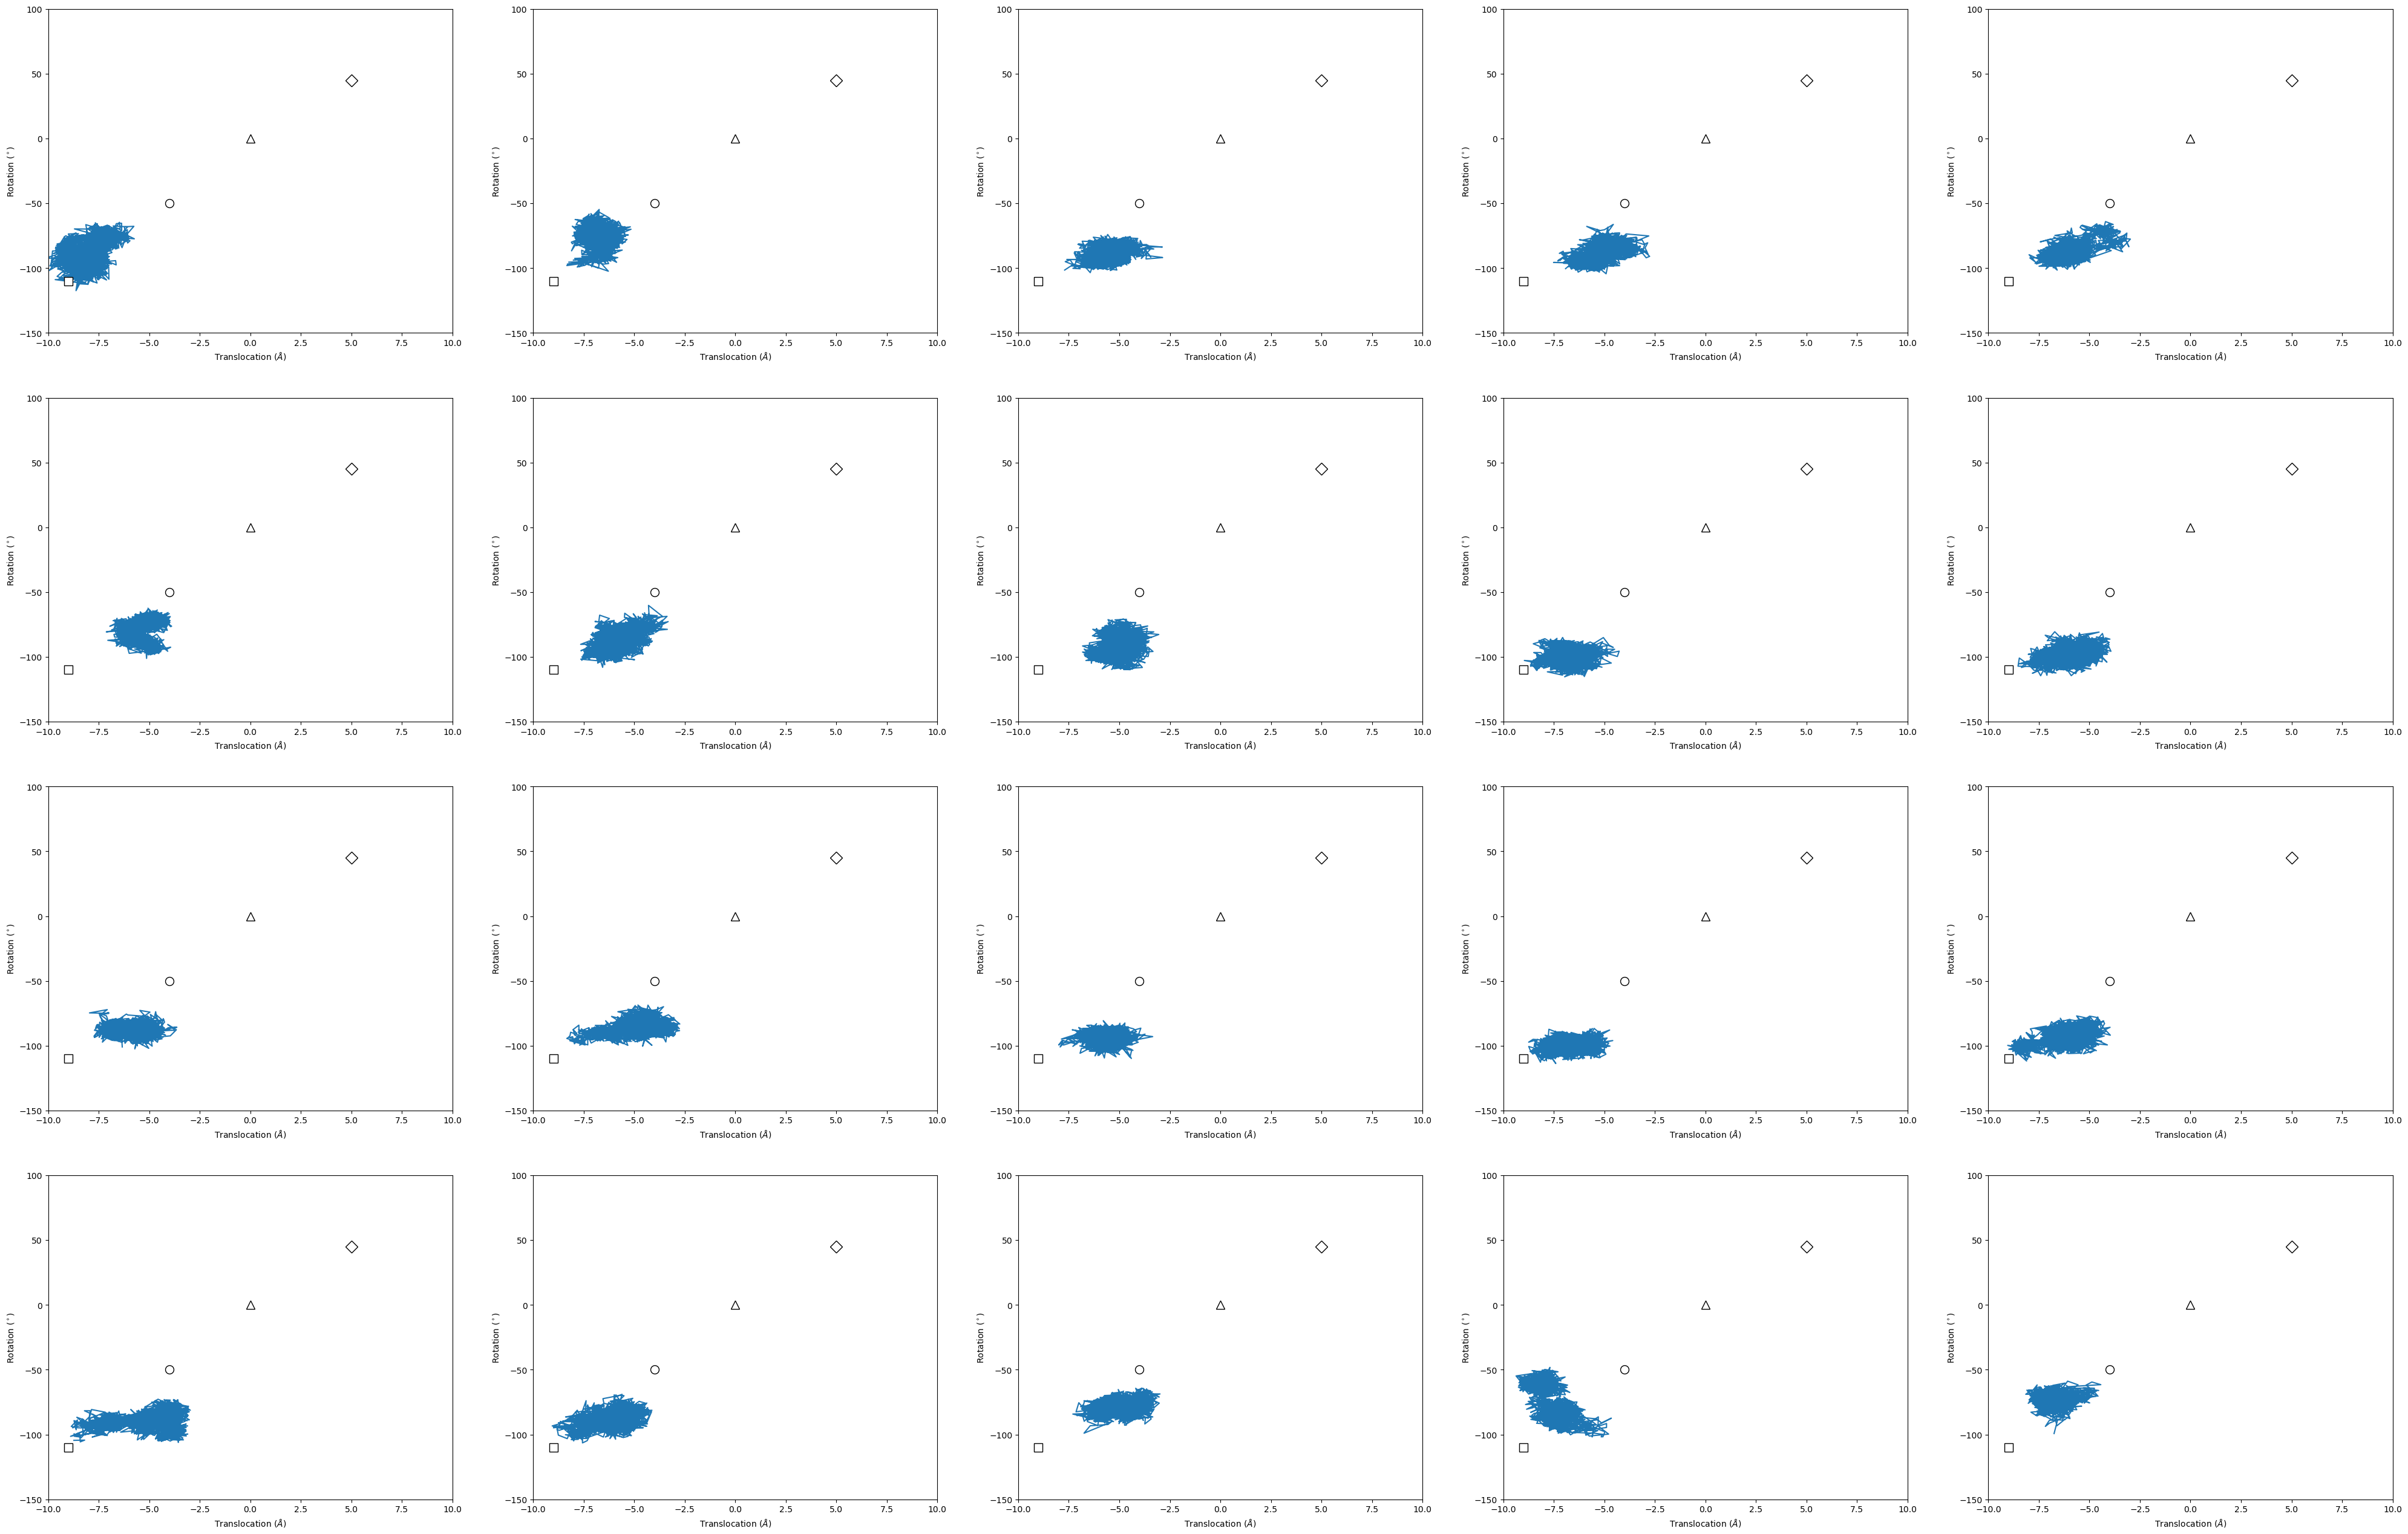

In [44]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i][:, 0], cv_trajs[i][:, 1])
    util.format_cvs(ax)

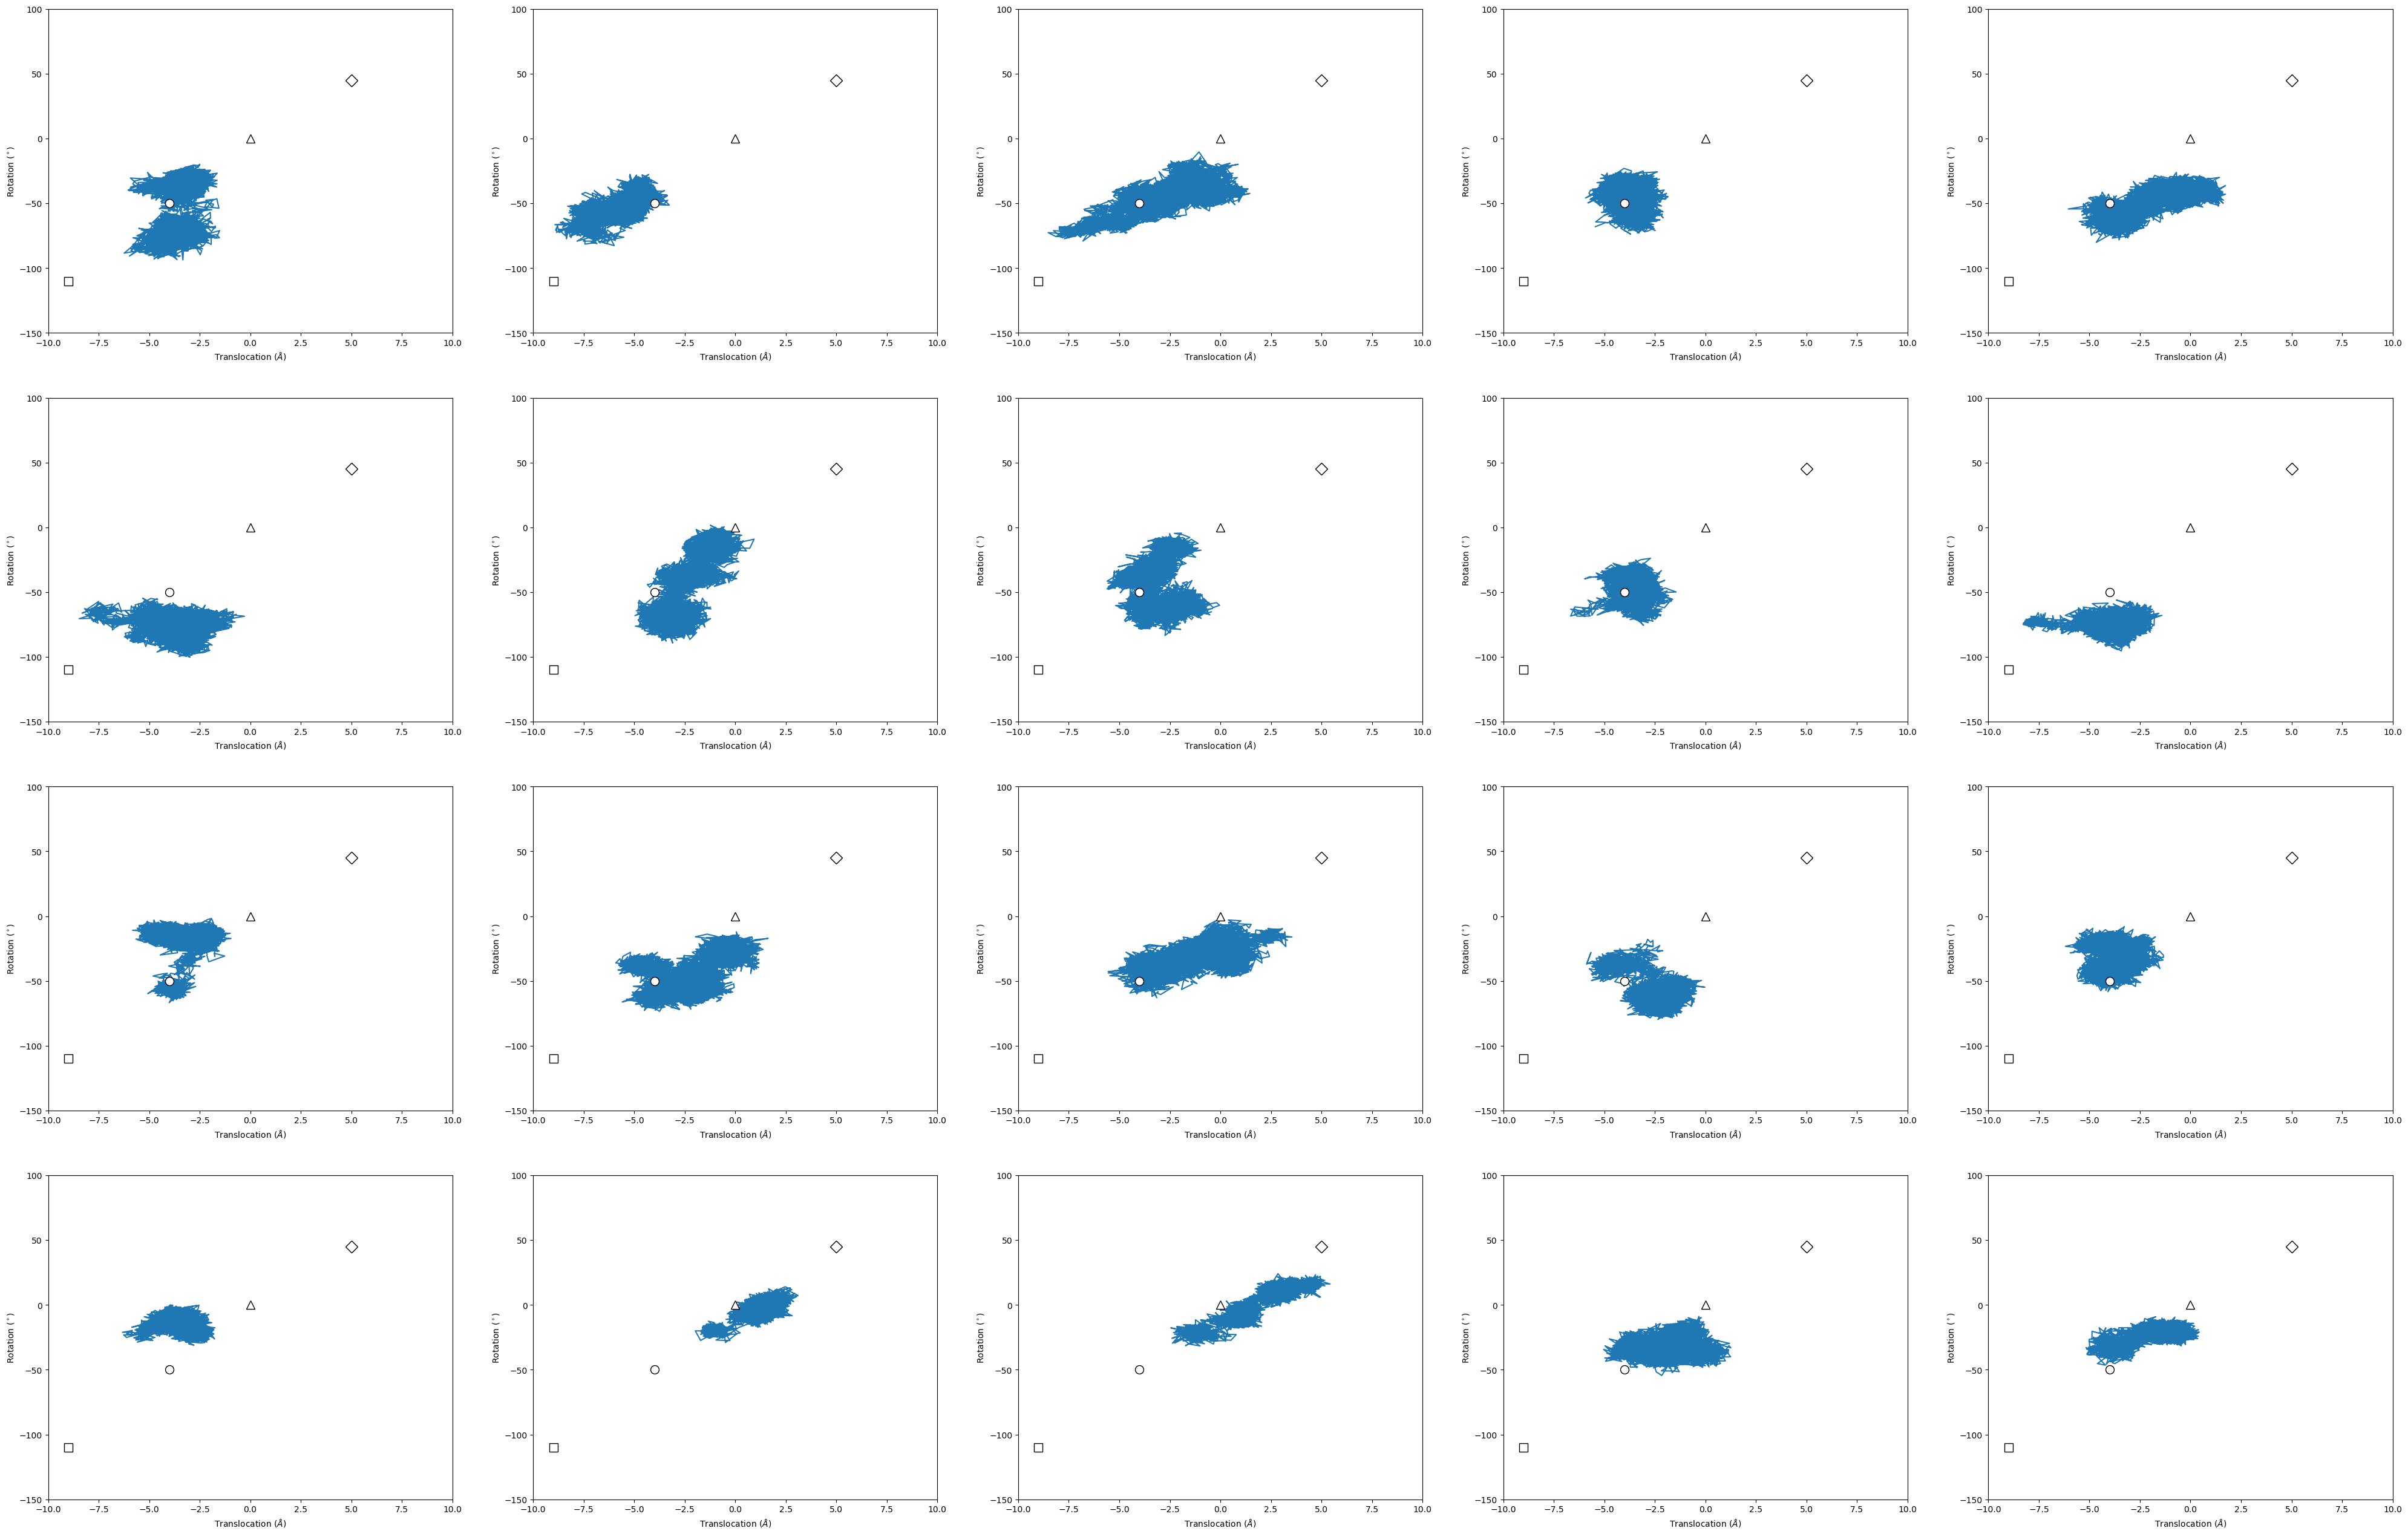

In [34]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1000][:, 0], cv_trajs[i + 1000][:, 1])
    util.format_cvs(ax)

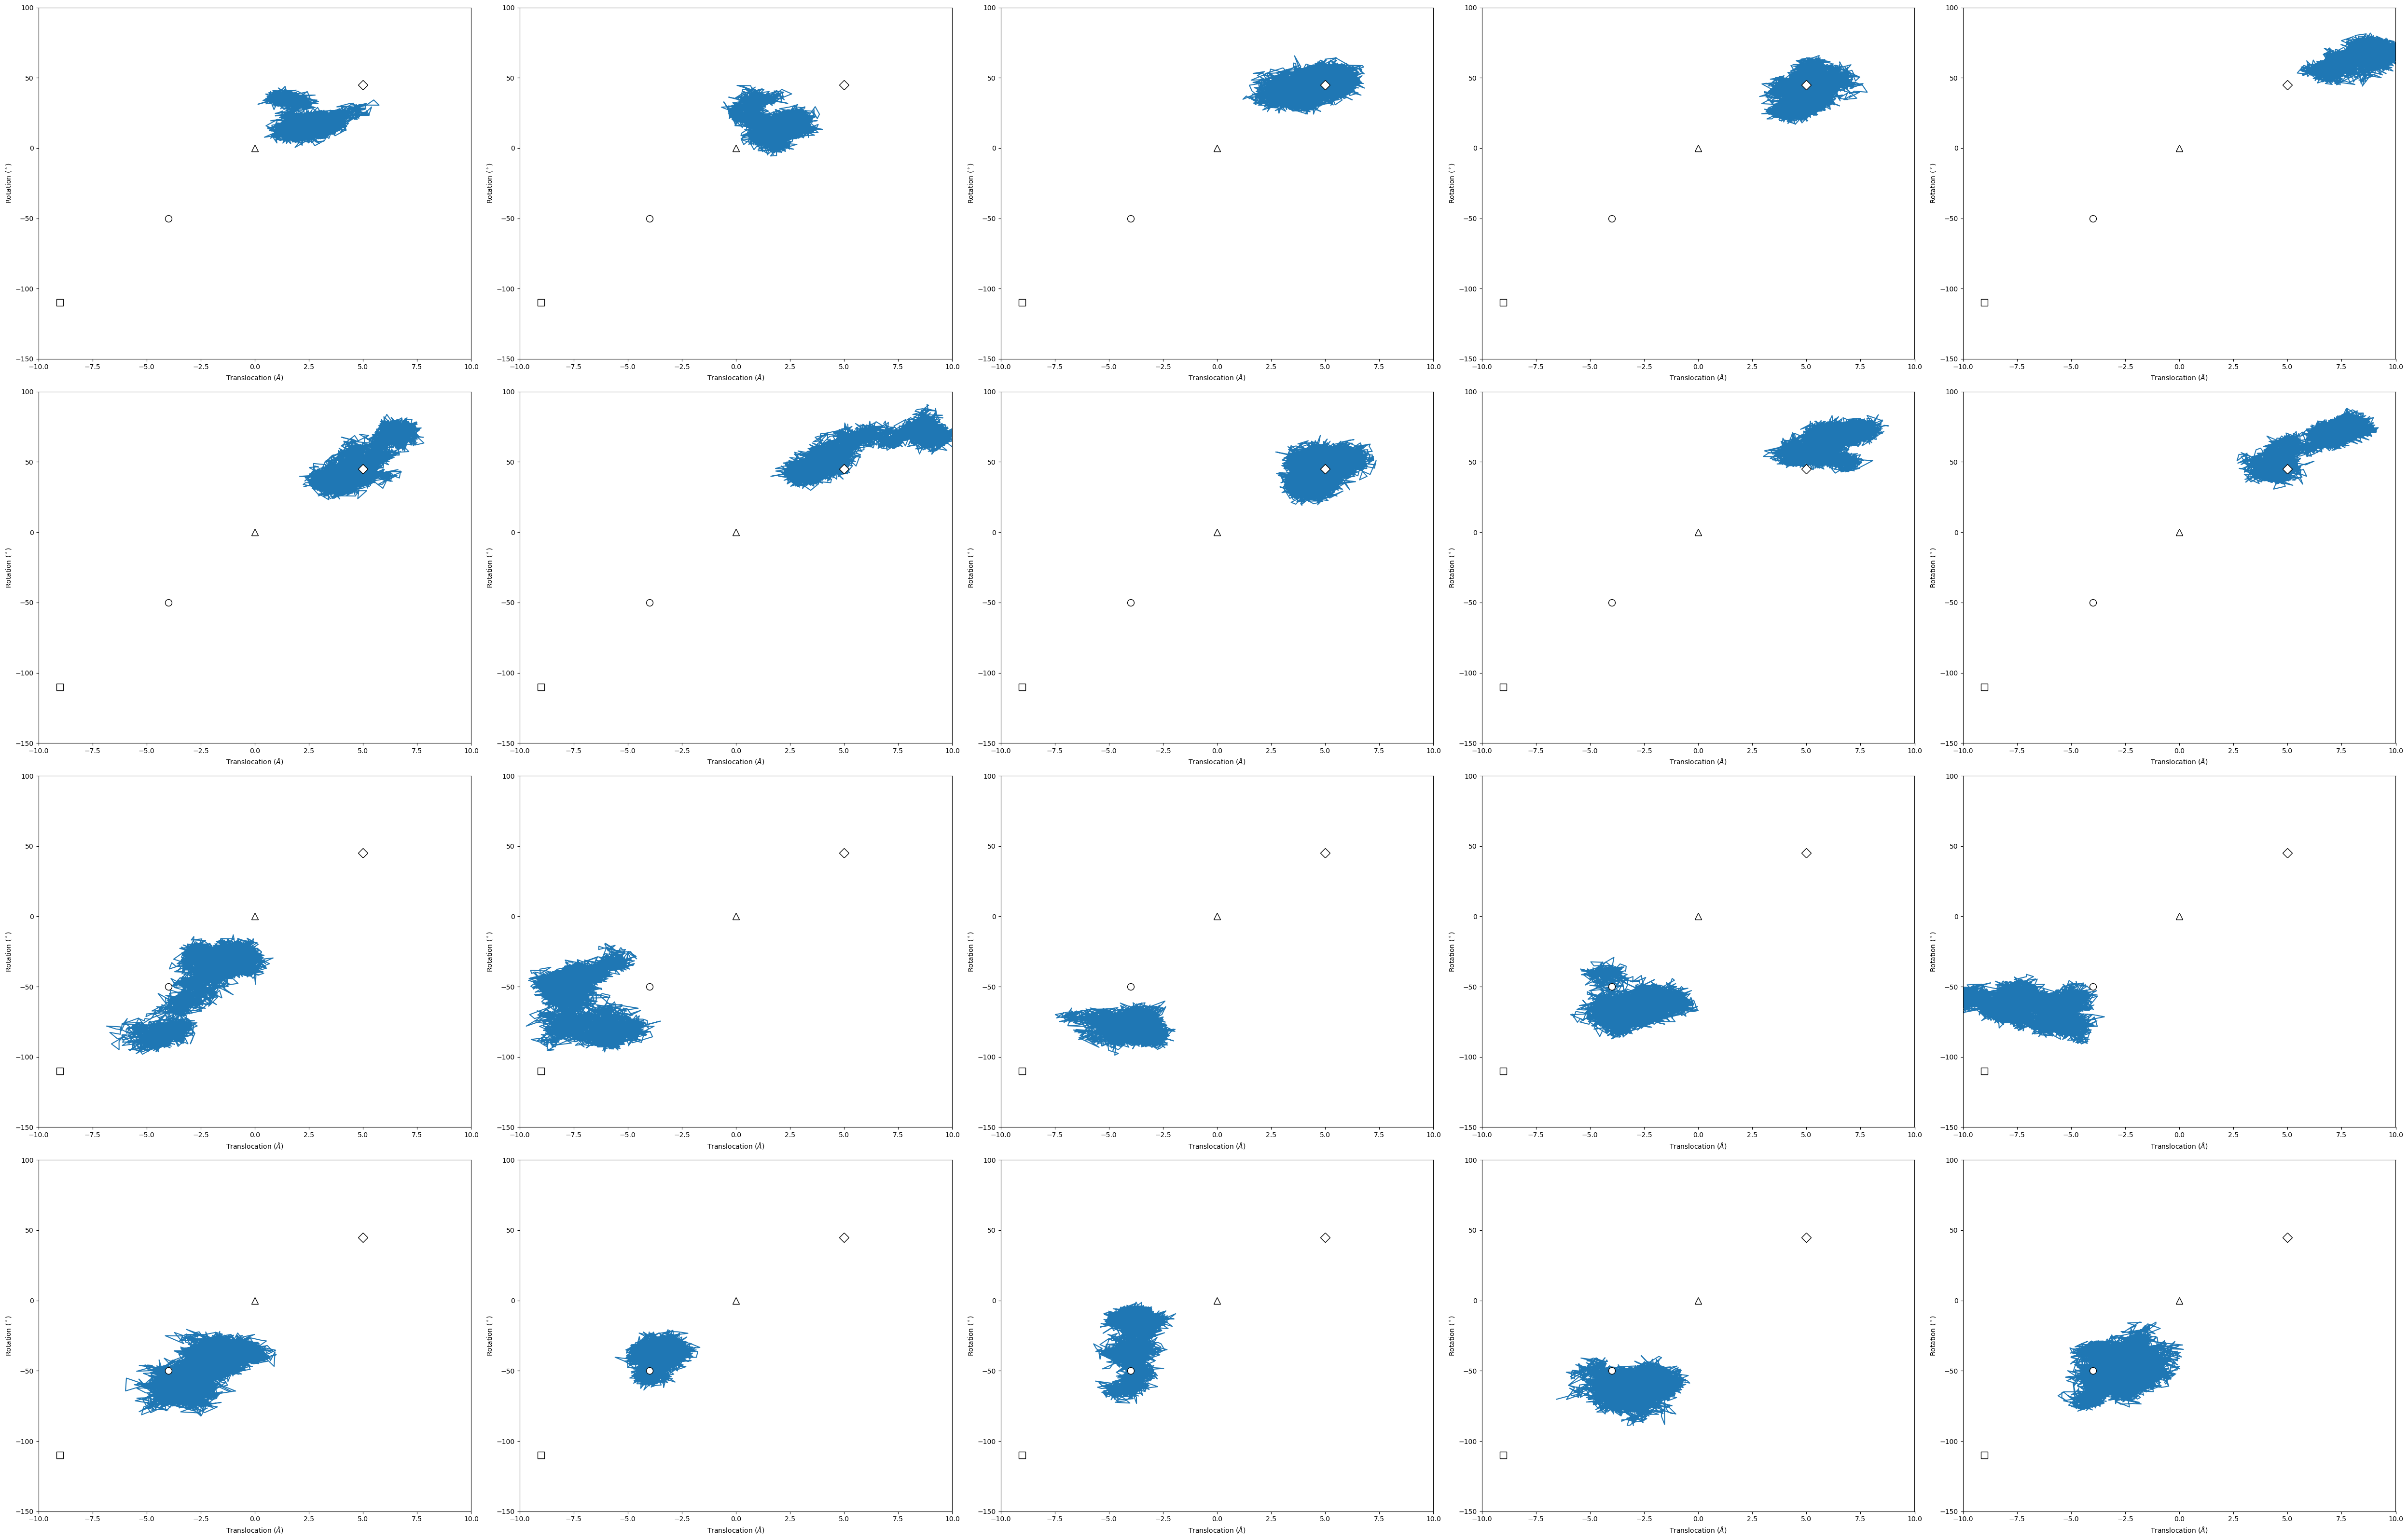

In [54]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1040][:, 0], cv_trajs[i + 1040][:, 1])
    util.format_cvs(ax)

f.tight_layout()

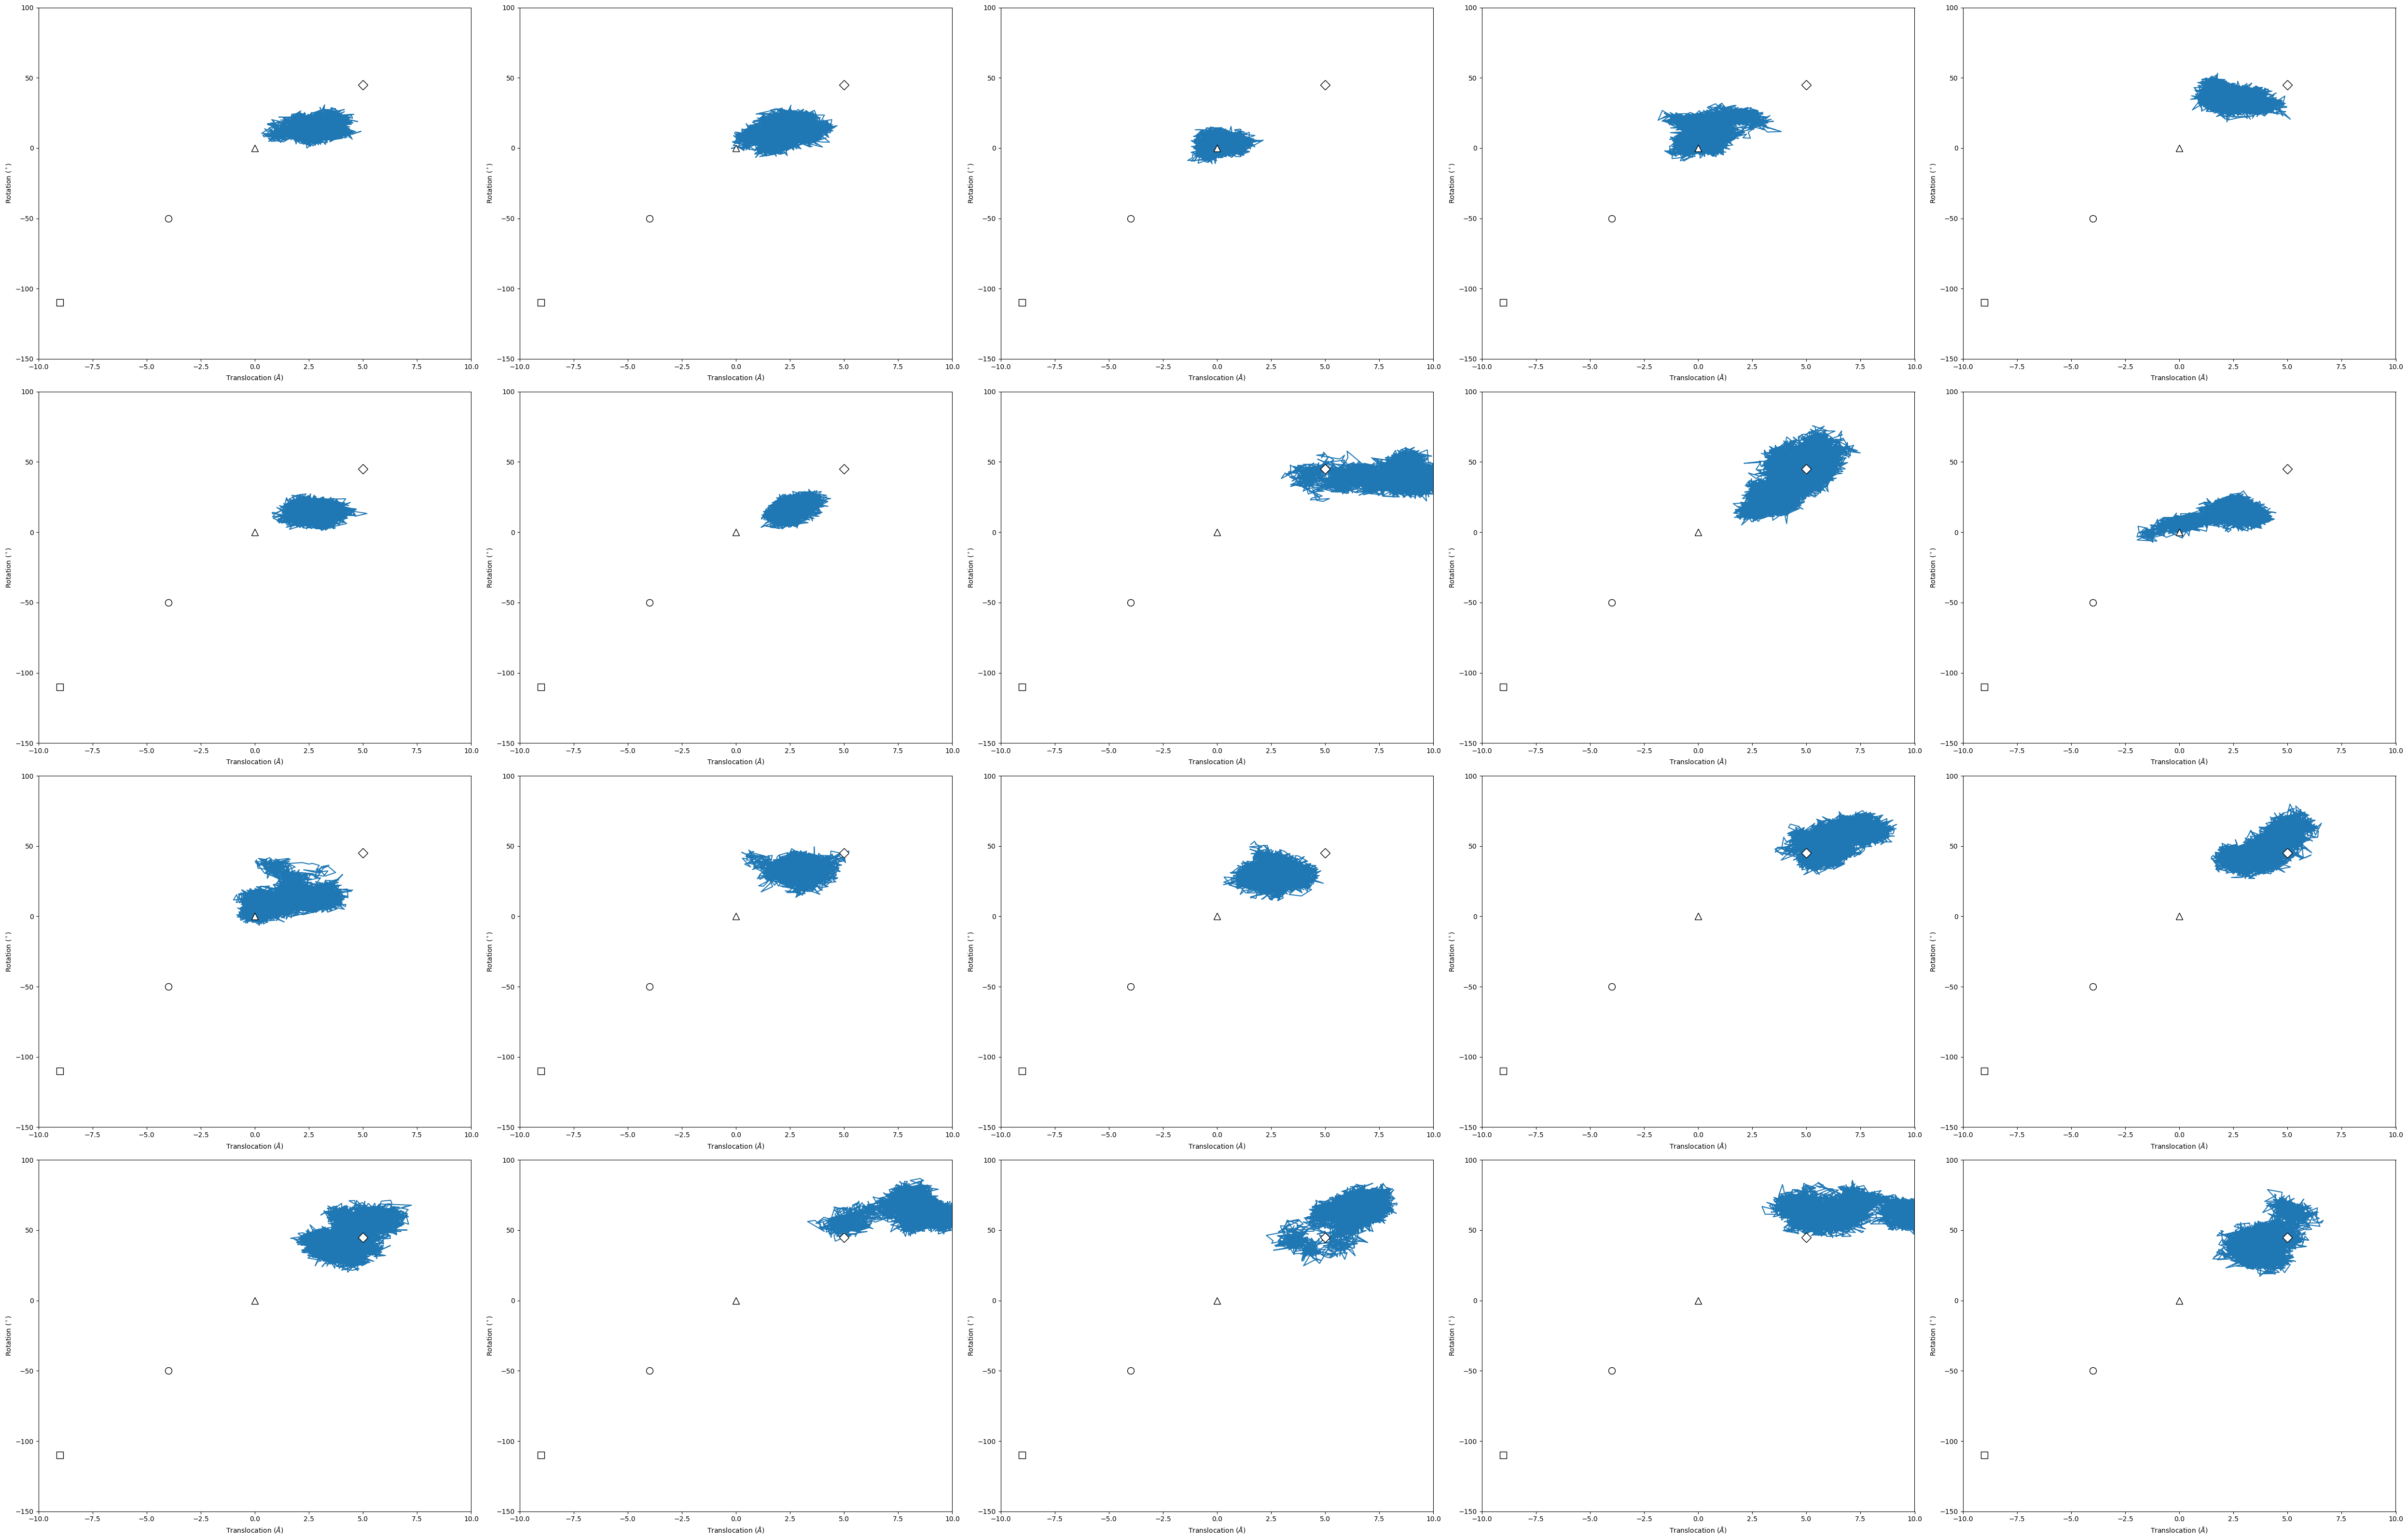

In [58]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1080][:, 0], cv_trajs[i + 1080][:, 1])
    util.format_cvs(ax)

f.tight_layout()

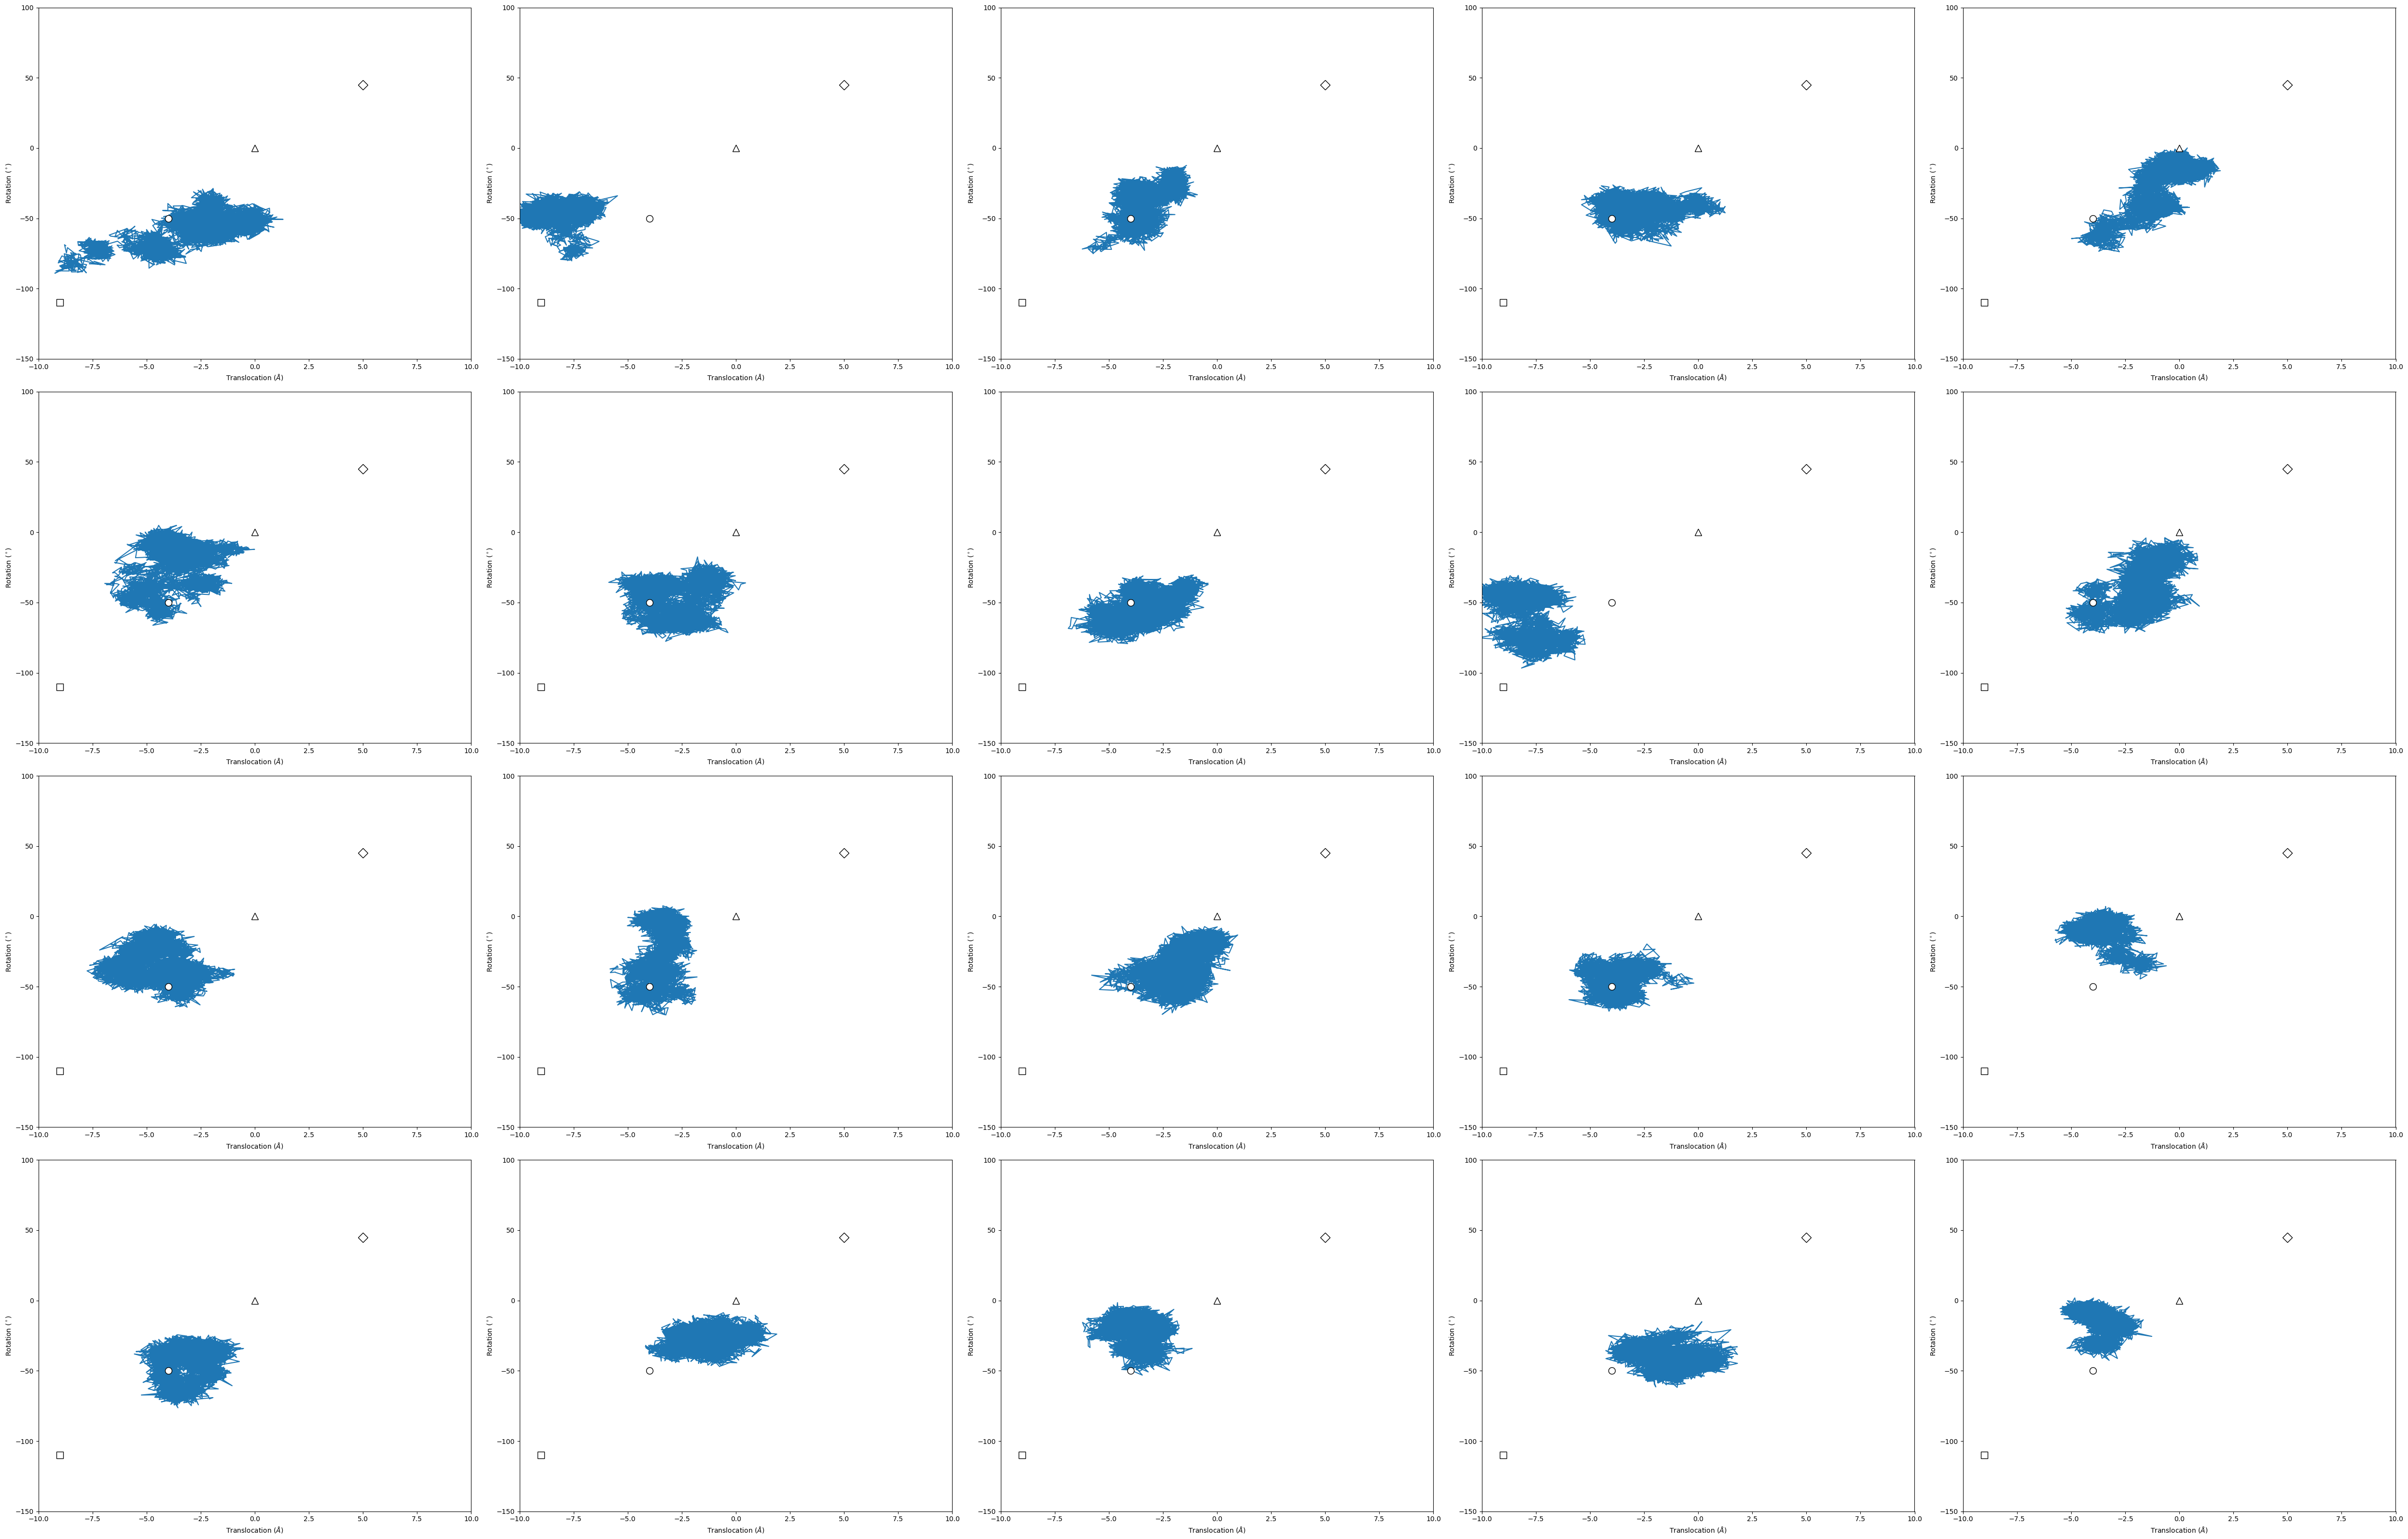

In [35]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1100][:, 0], cv_trajs[i + 1100][:, 1])
    util.format_cvs(ax)

f.tight_layout()

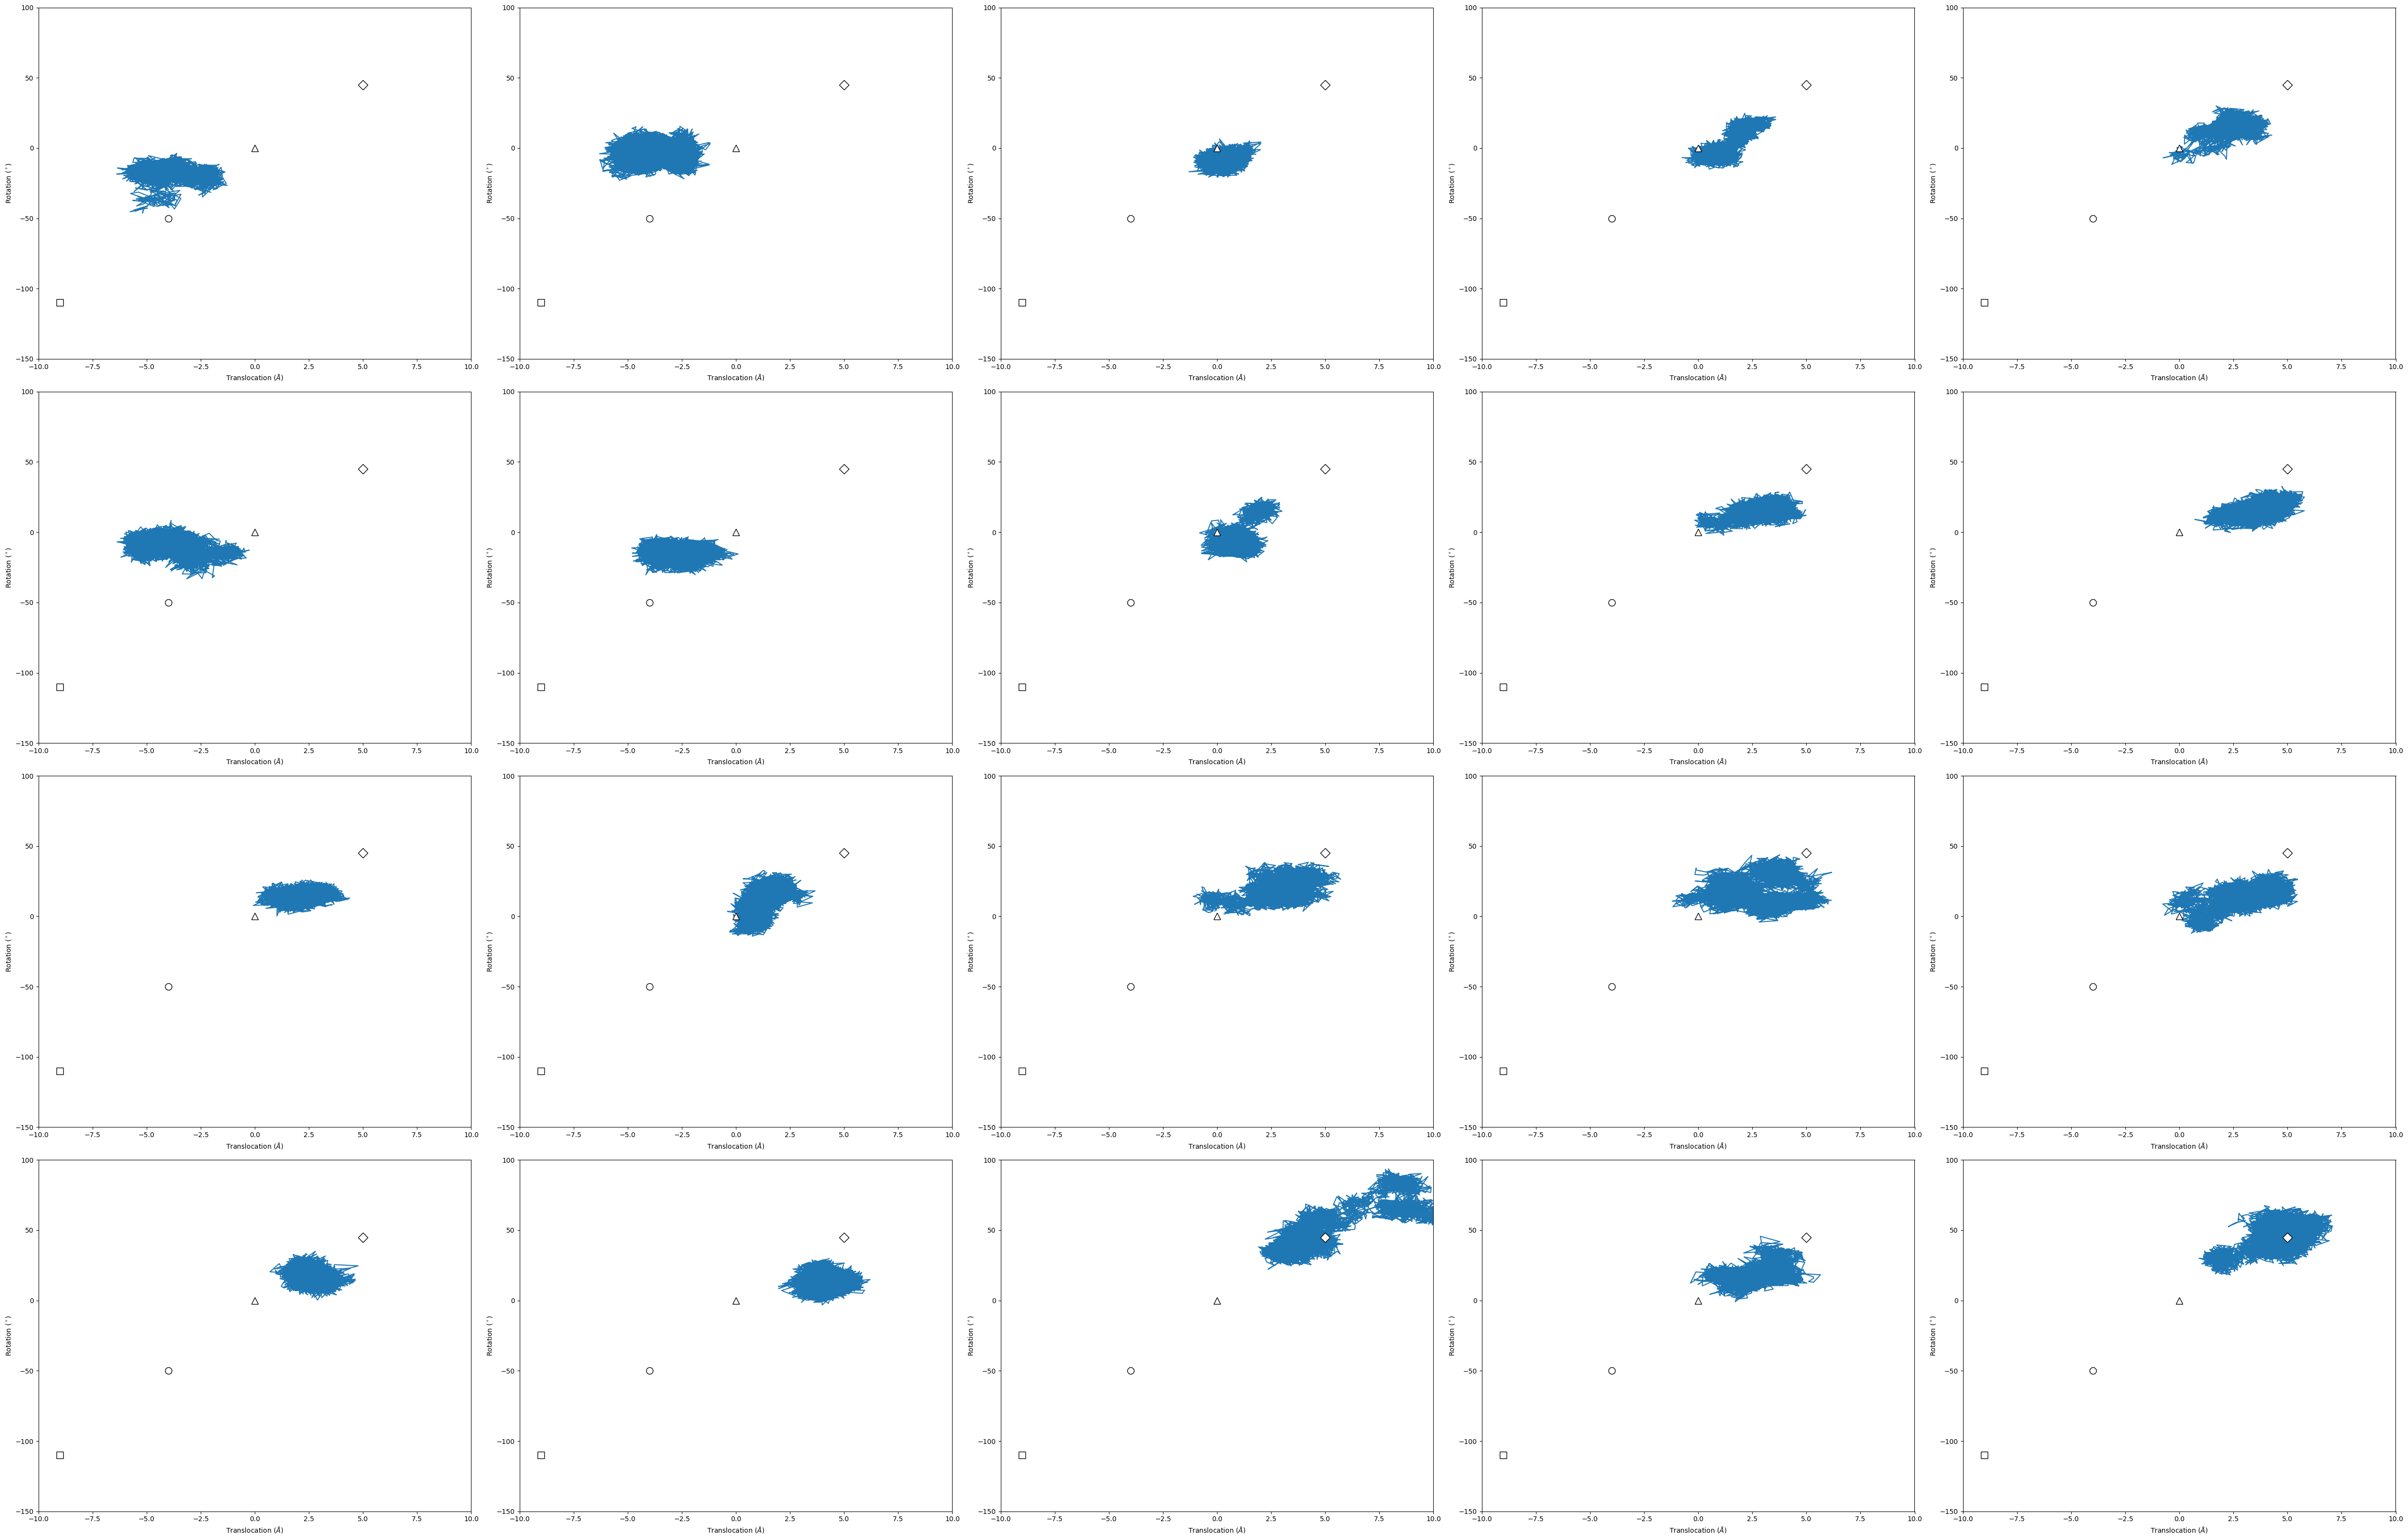

In [48]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1120][:, 0], cv_trajs[i + 1120][:, 1])
    util.format_cvs(ax)

f.tight_layout()

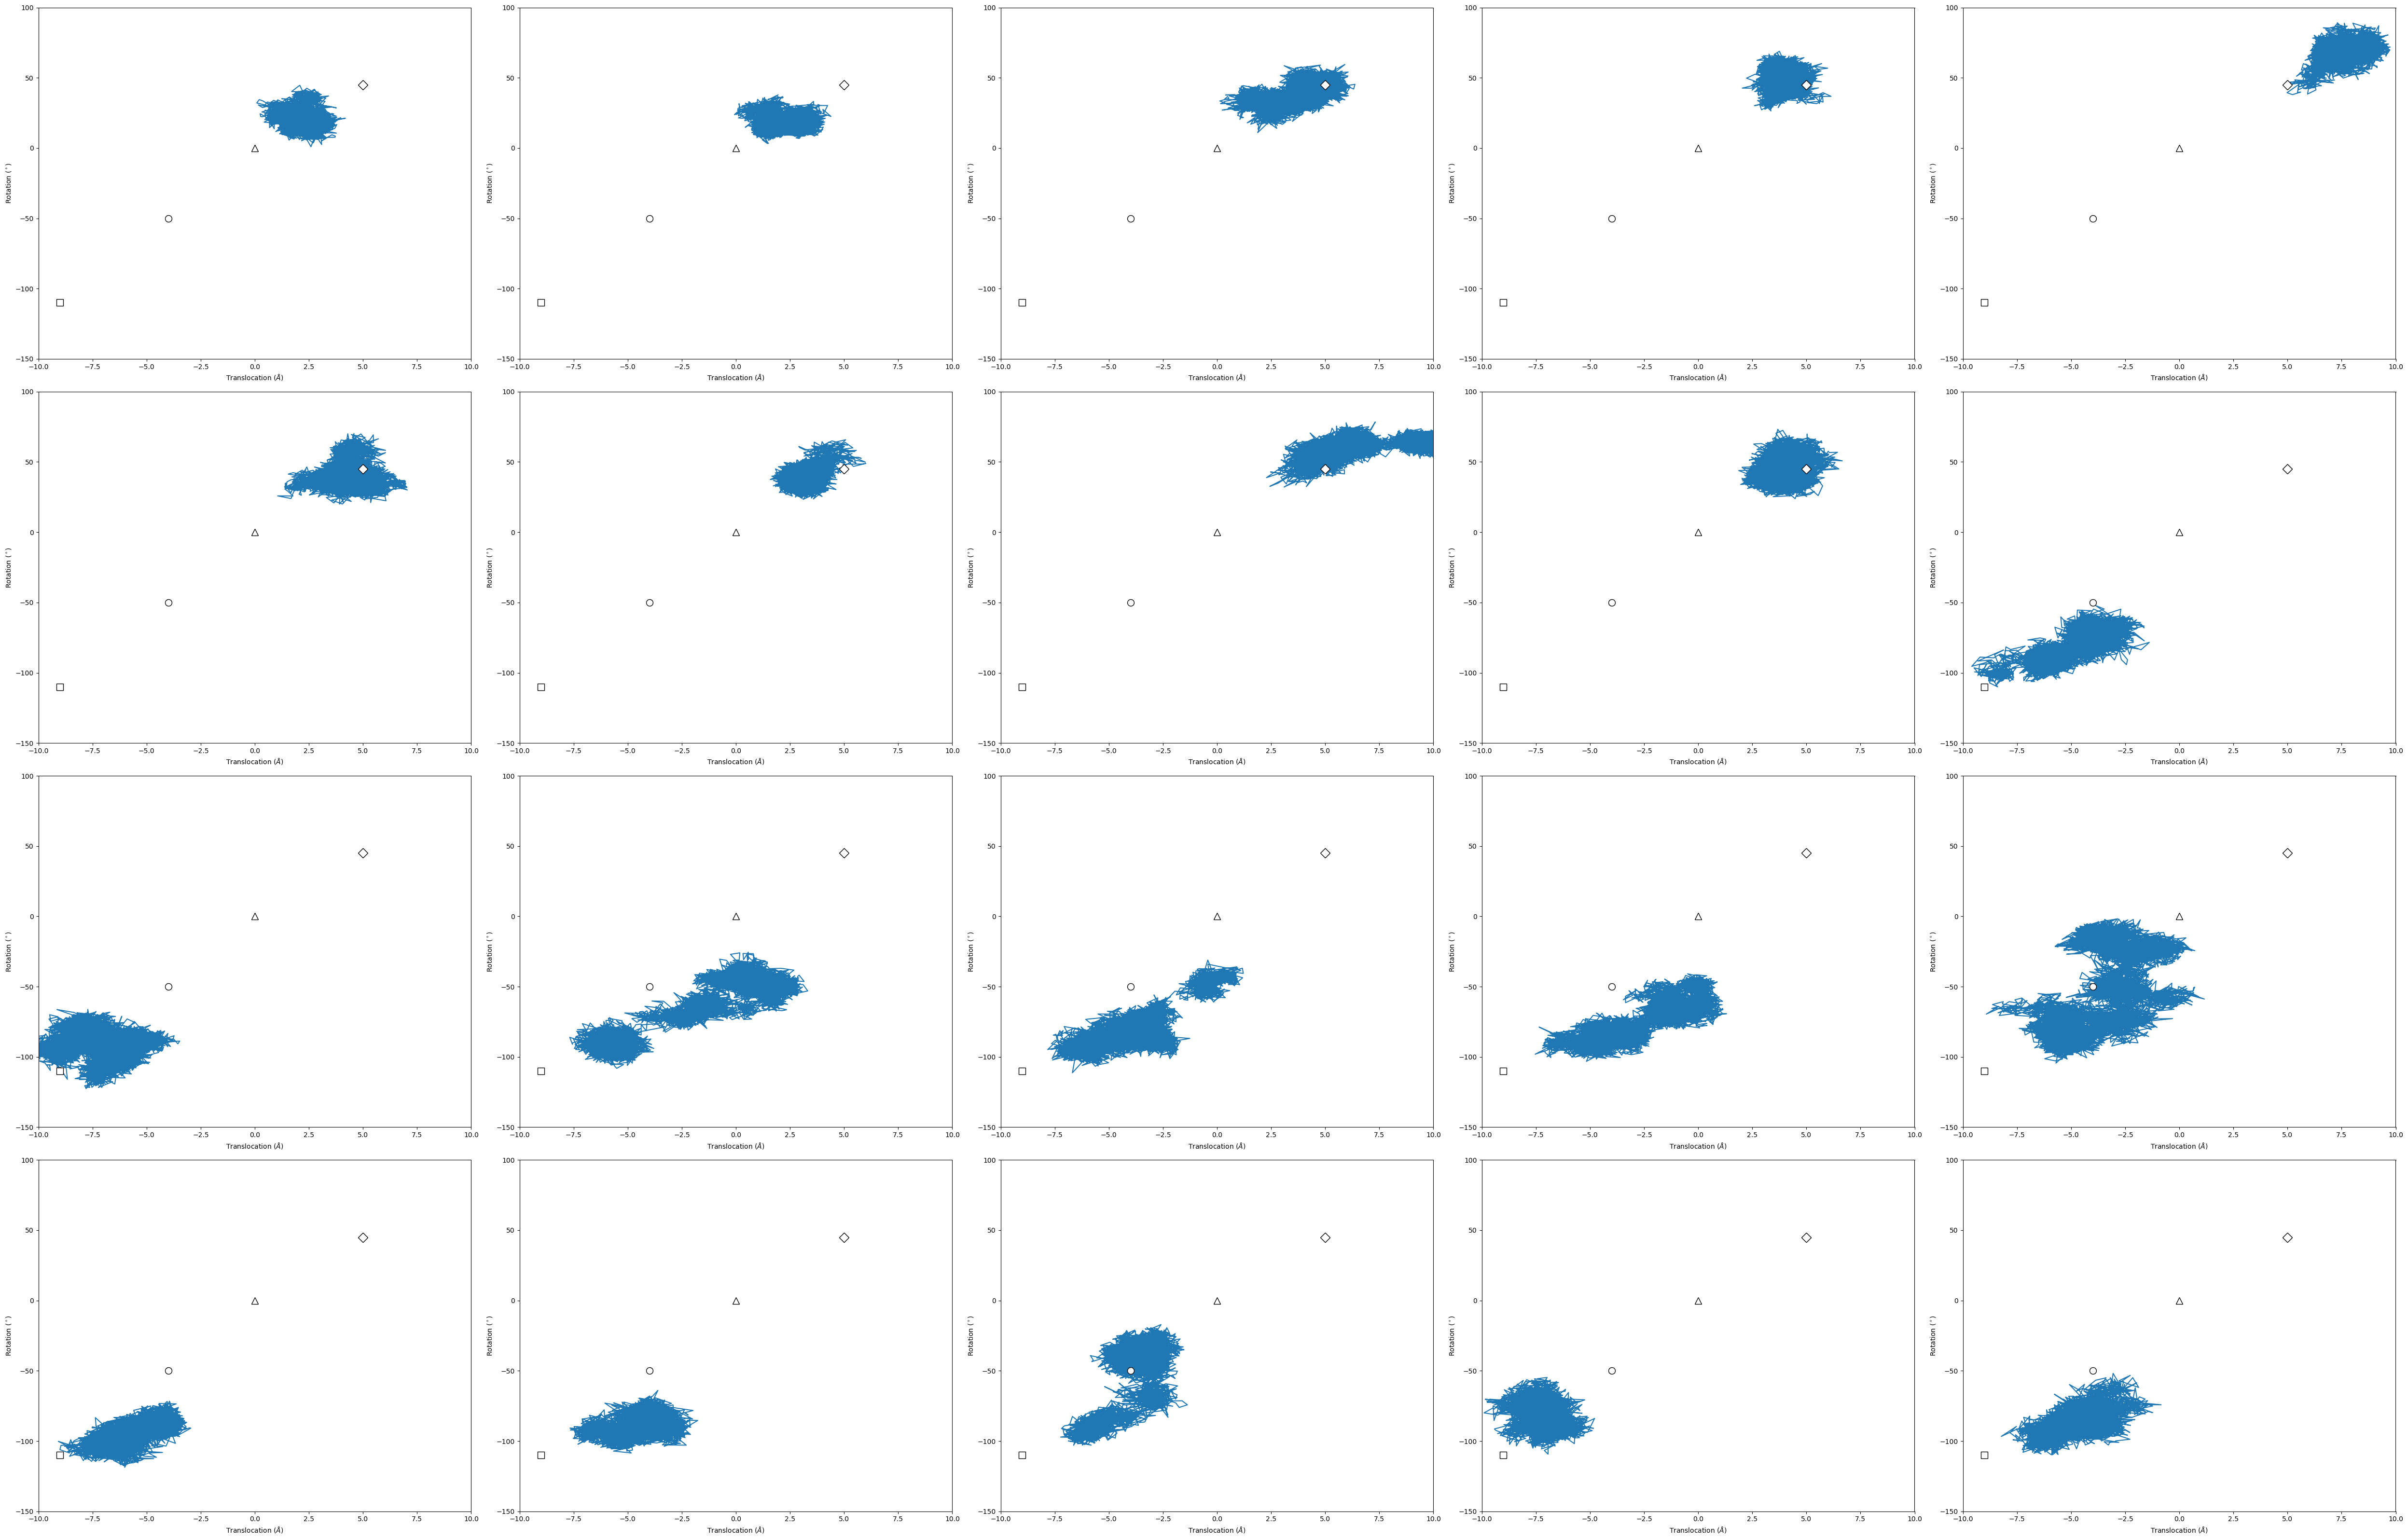

In [49]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1140][:, 0], cv_trajs[i + 1140][:, 1])
    util.format_cvs(ax)

f.tight_layout()

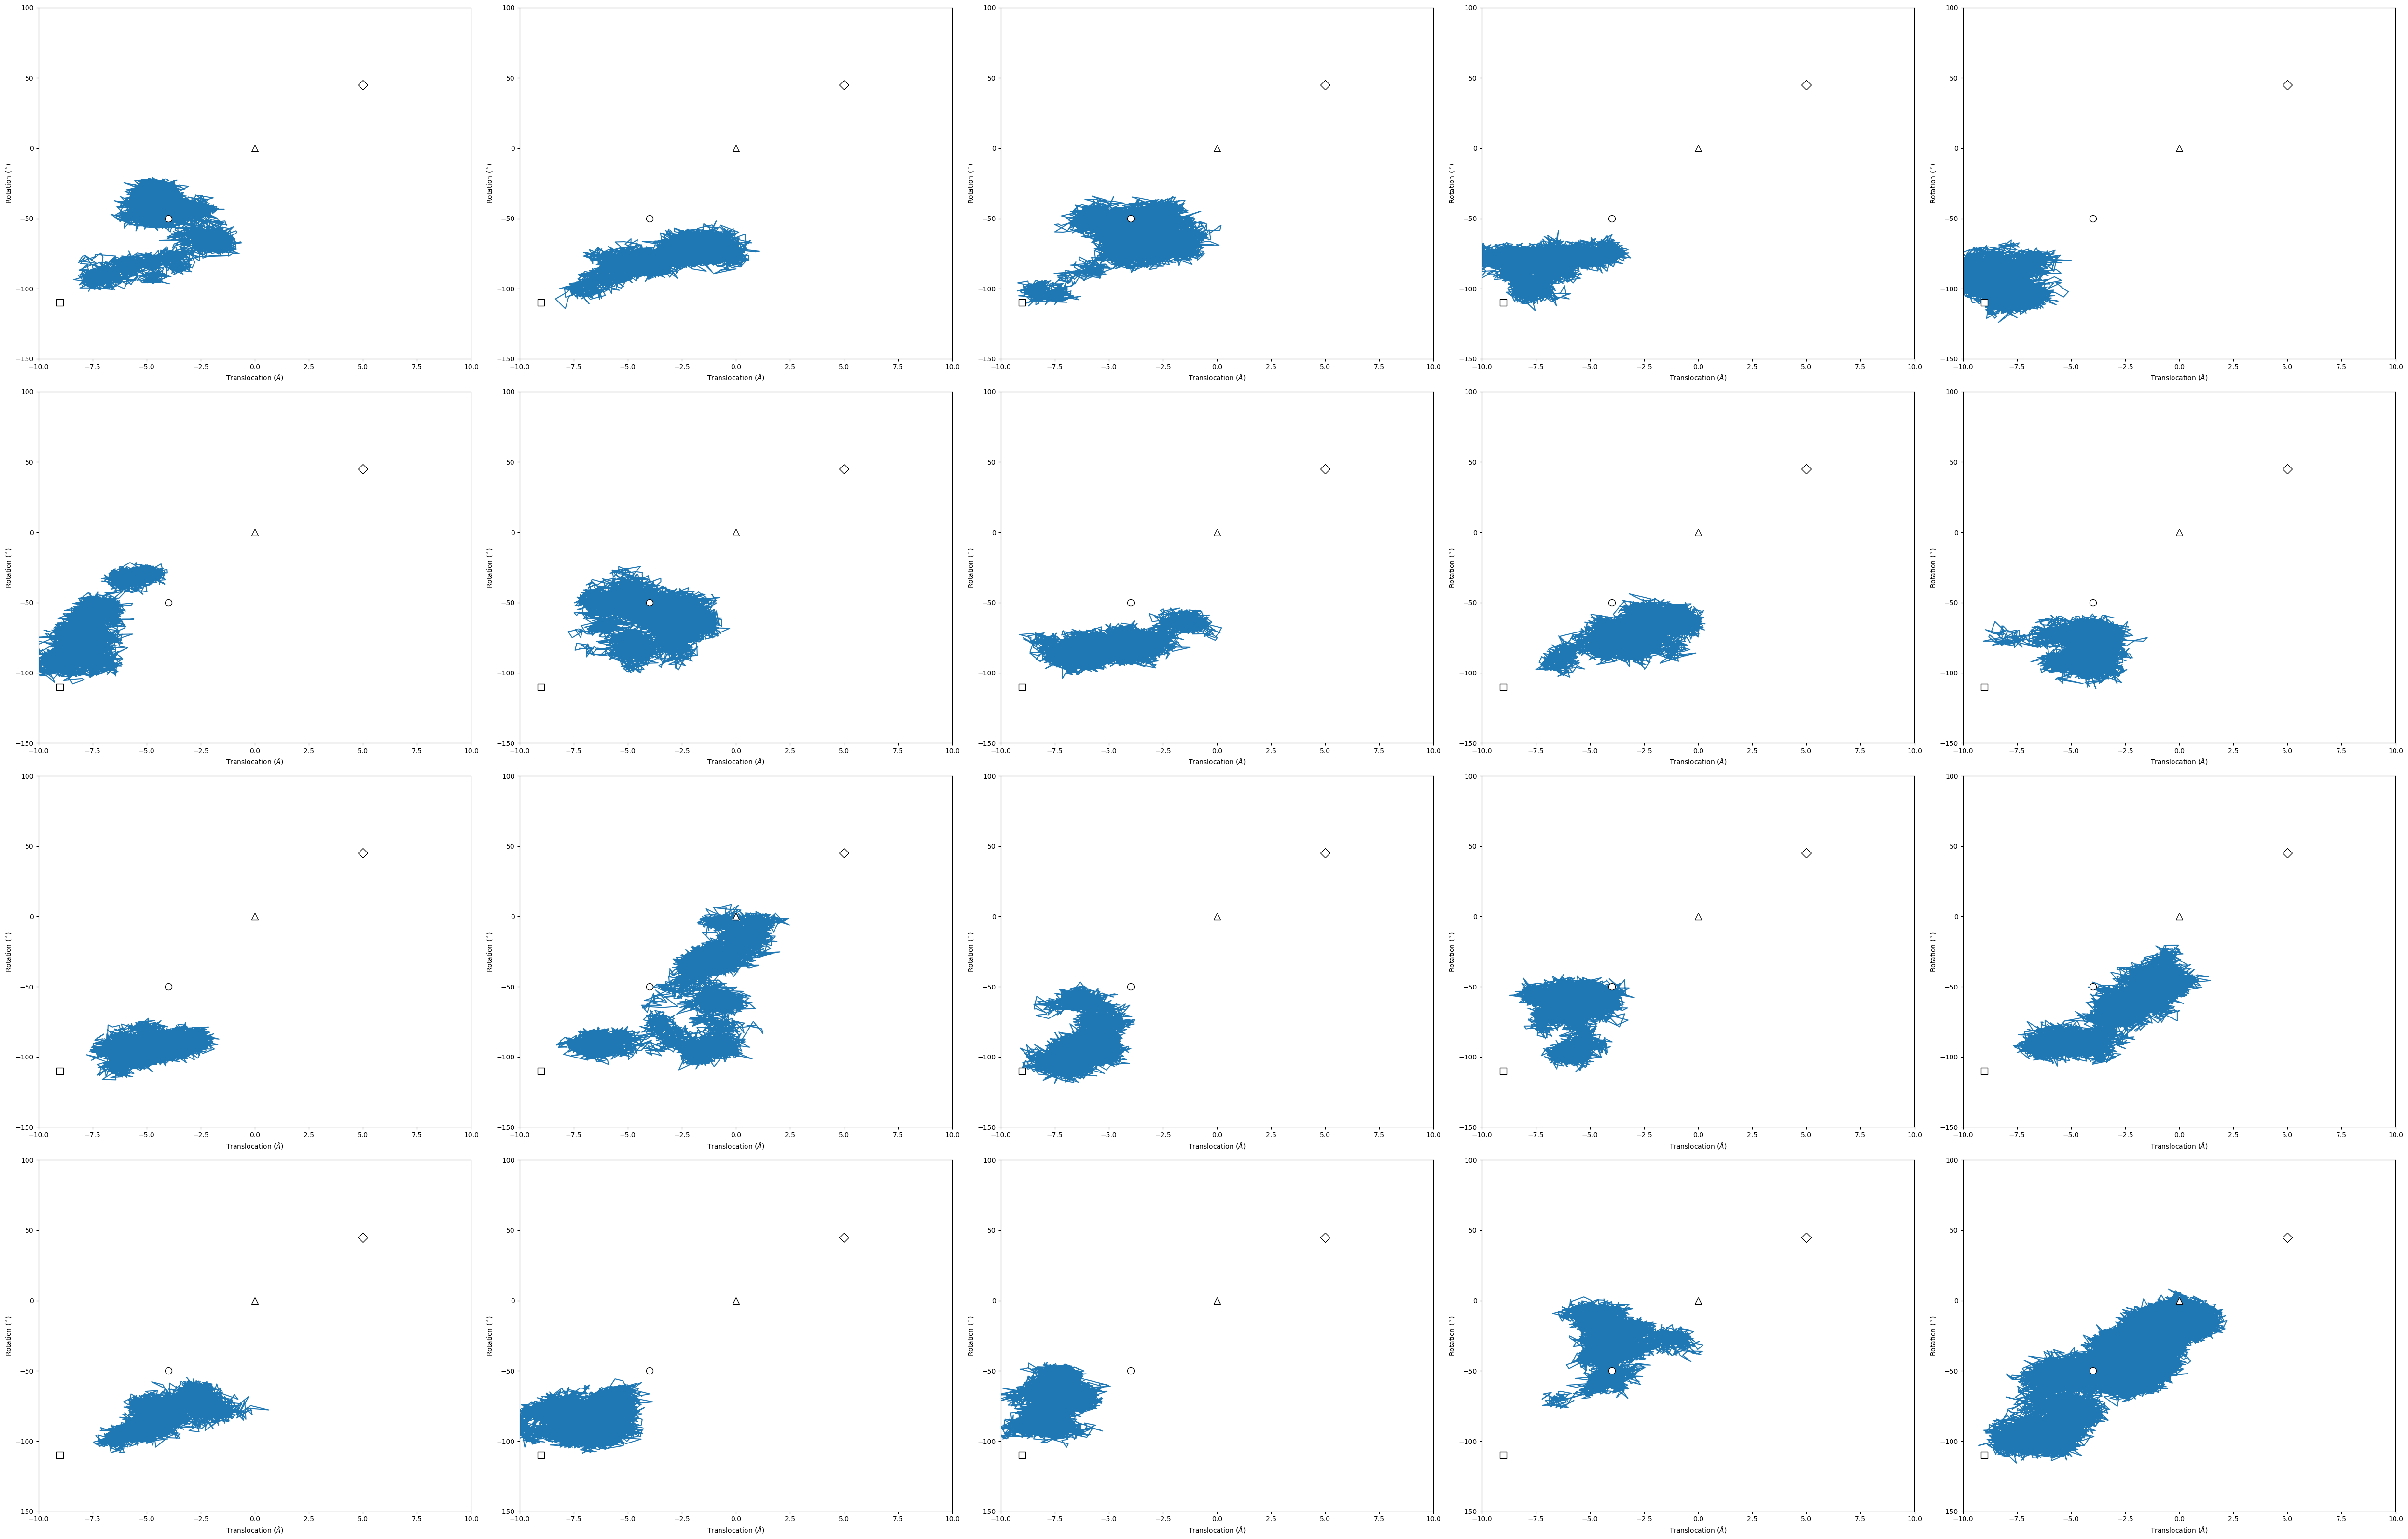

In [50]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1160][:, 0], cv_trajs[i + 1160][:, 1])
    util.format_cvs(ax)

f.tight_layout()

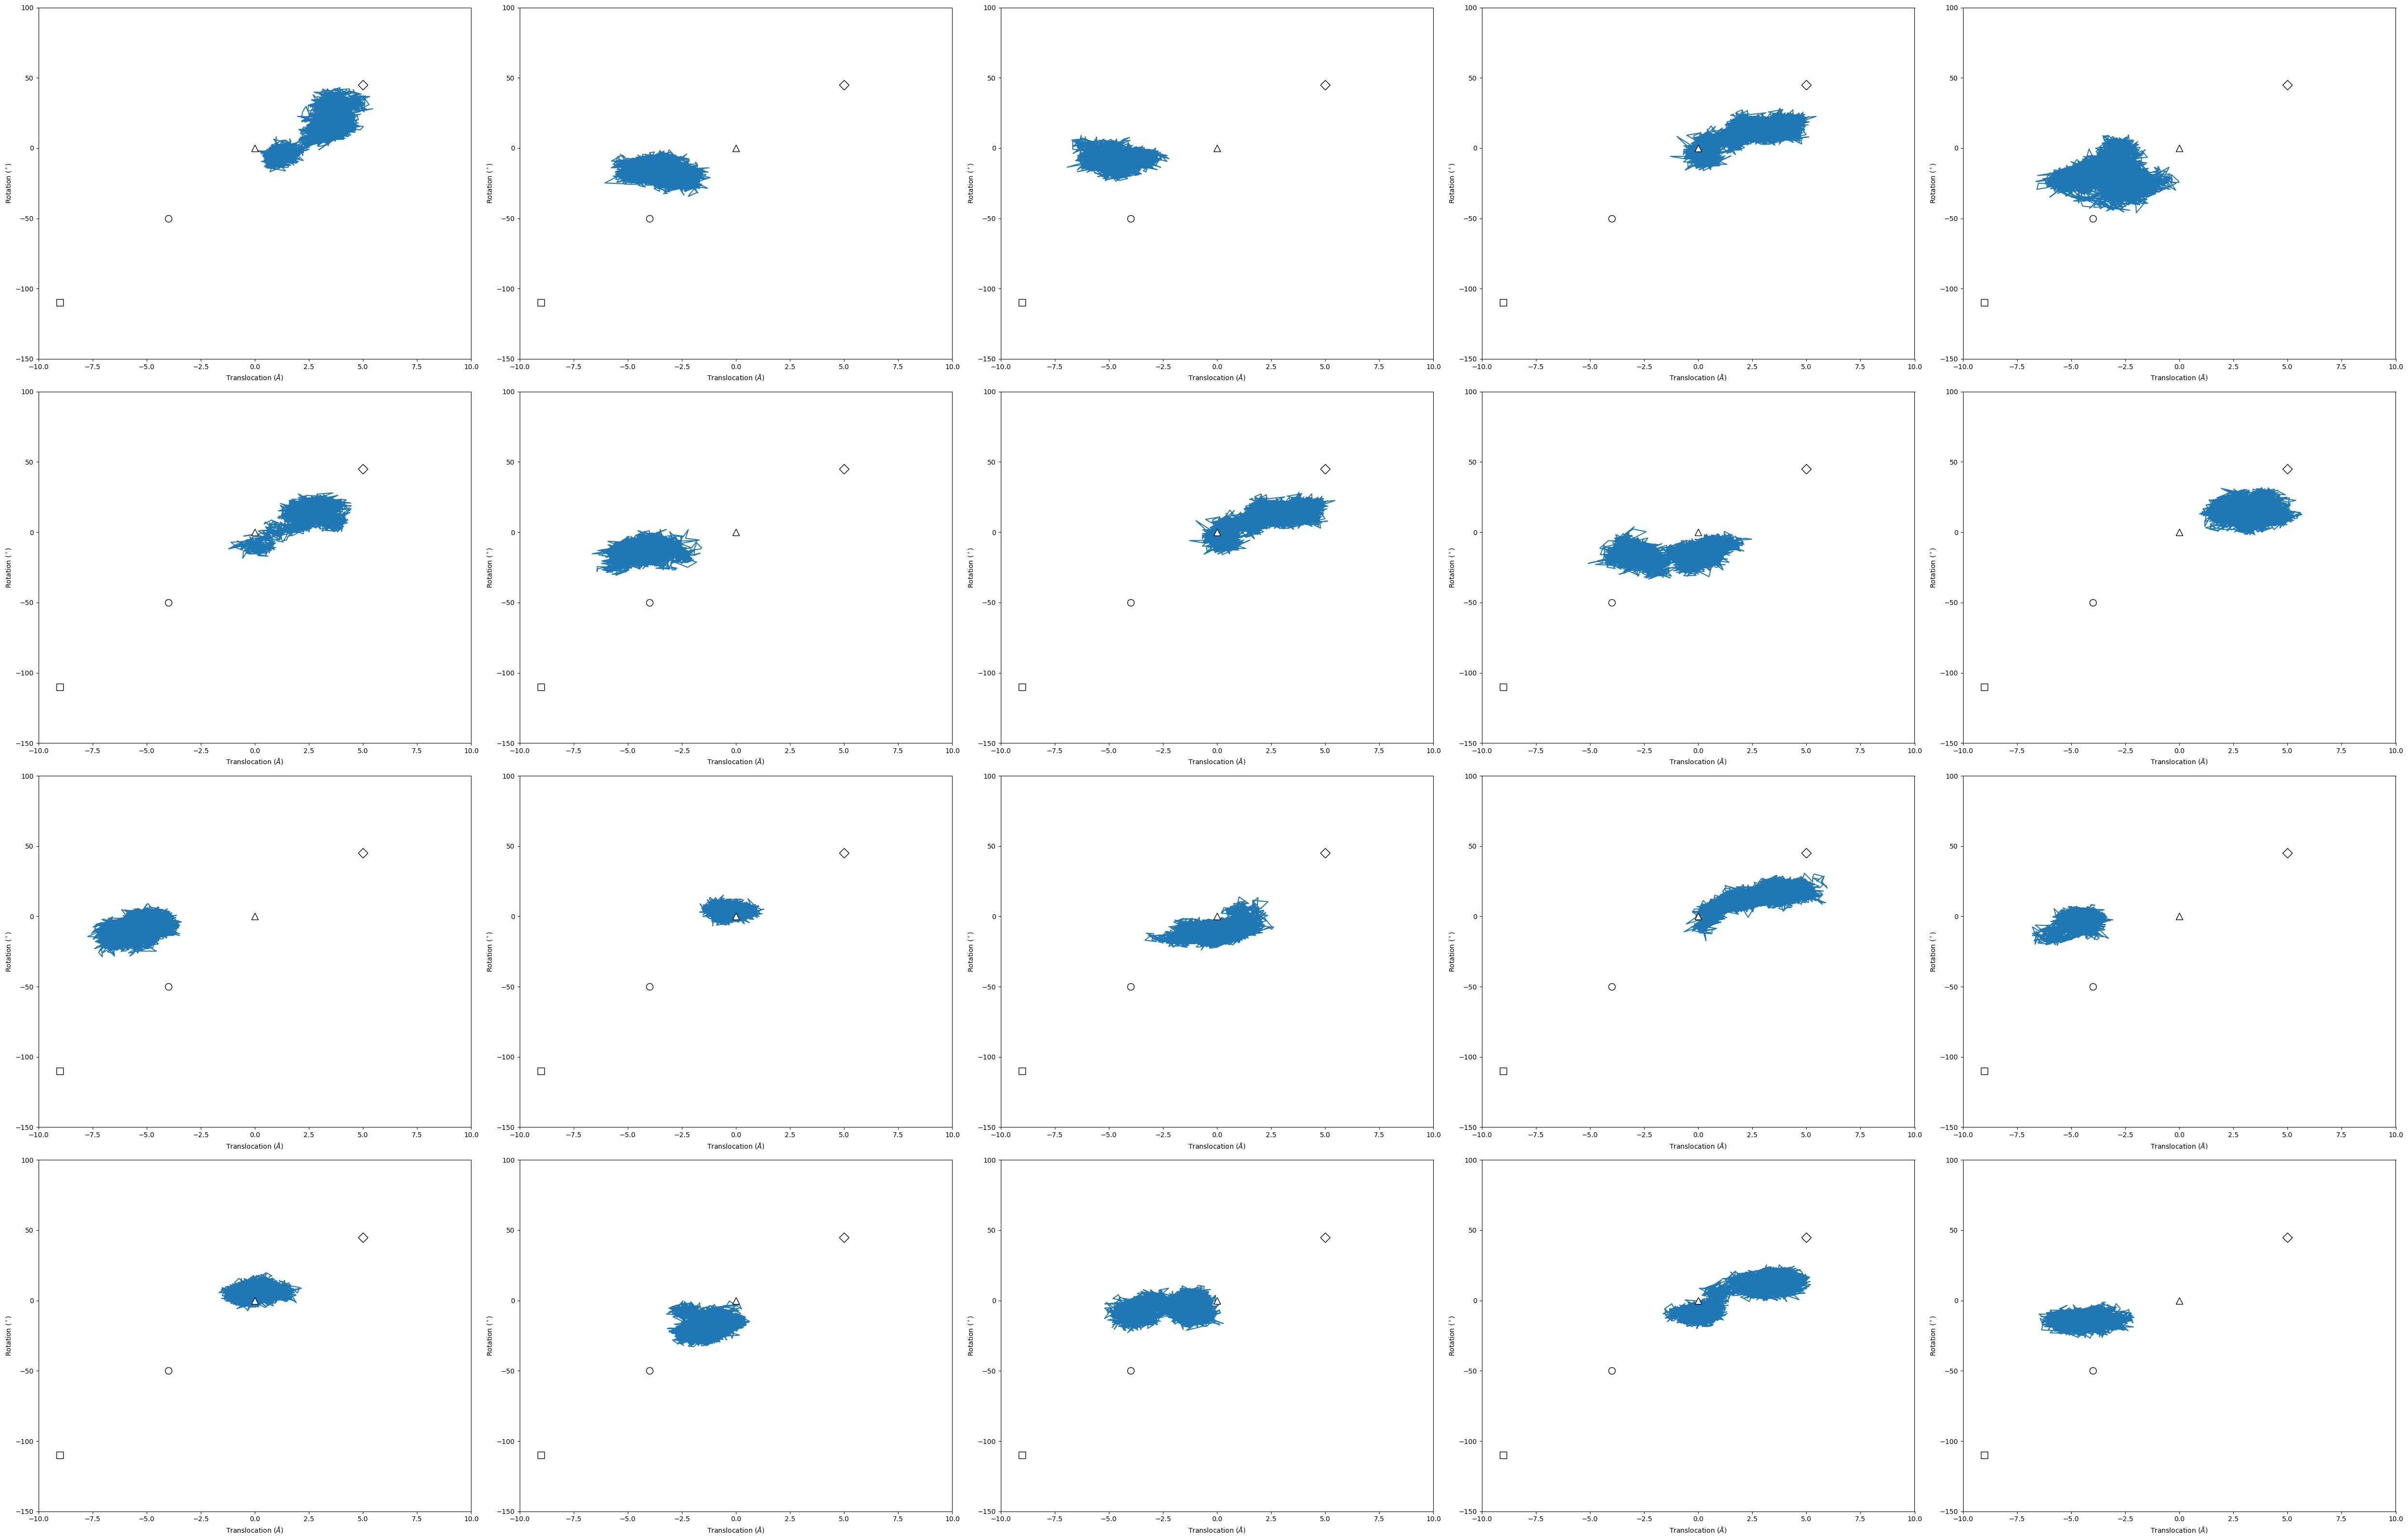

In [39]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1200][:, 0], cv_trajs[i + 1200][:, 1])
    util.format_cvs(ax)

f.tight_layout()

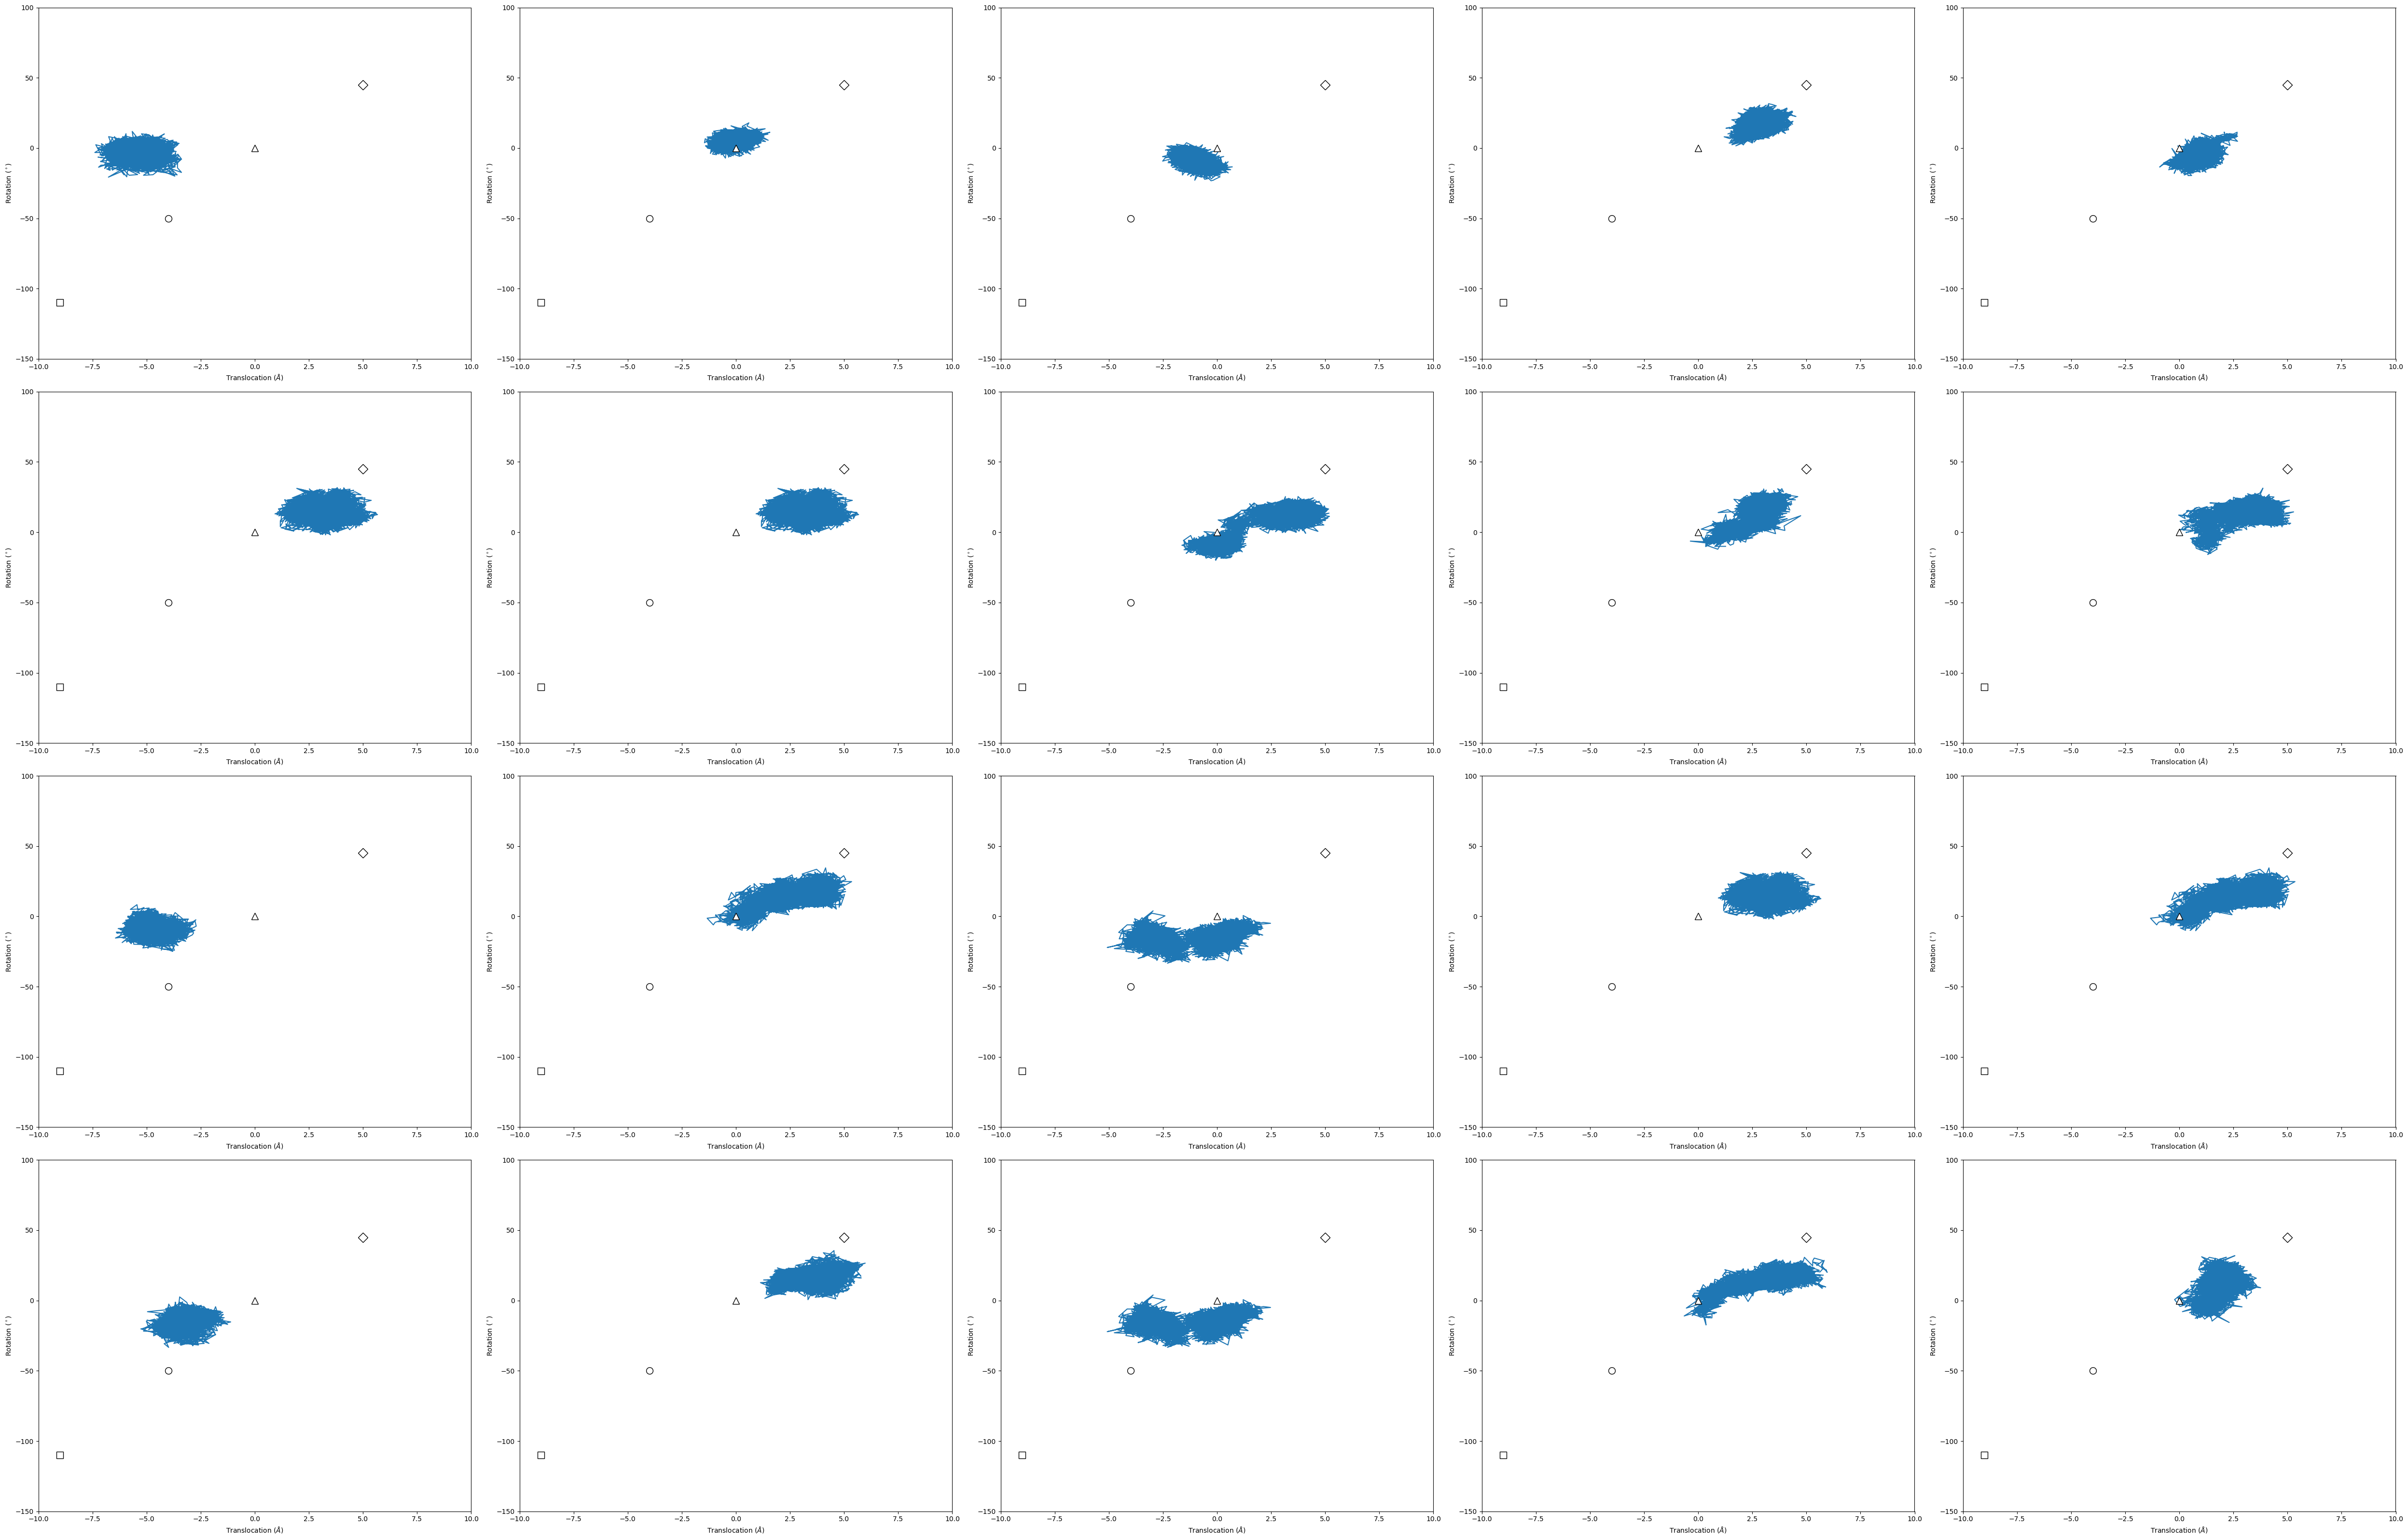

In [45]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1220][:, 0], cv_trajs[i + 1220][:, 1])
    util.format_cvs(ax)

f.tight_layout()

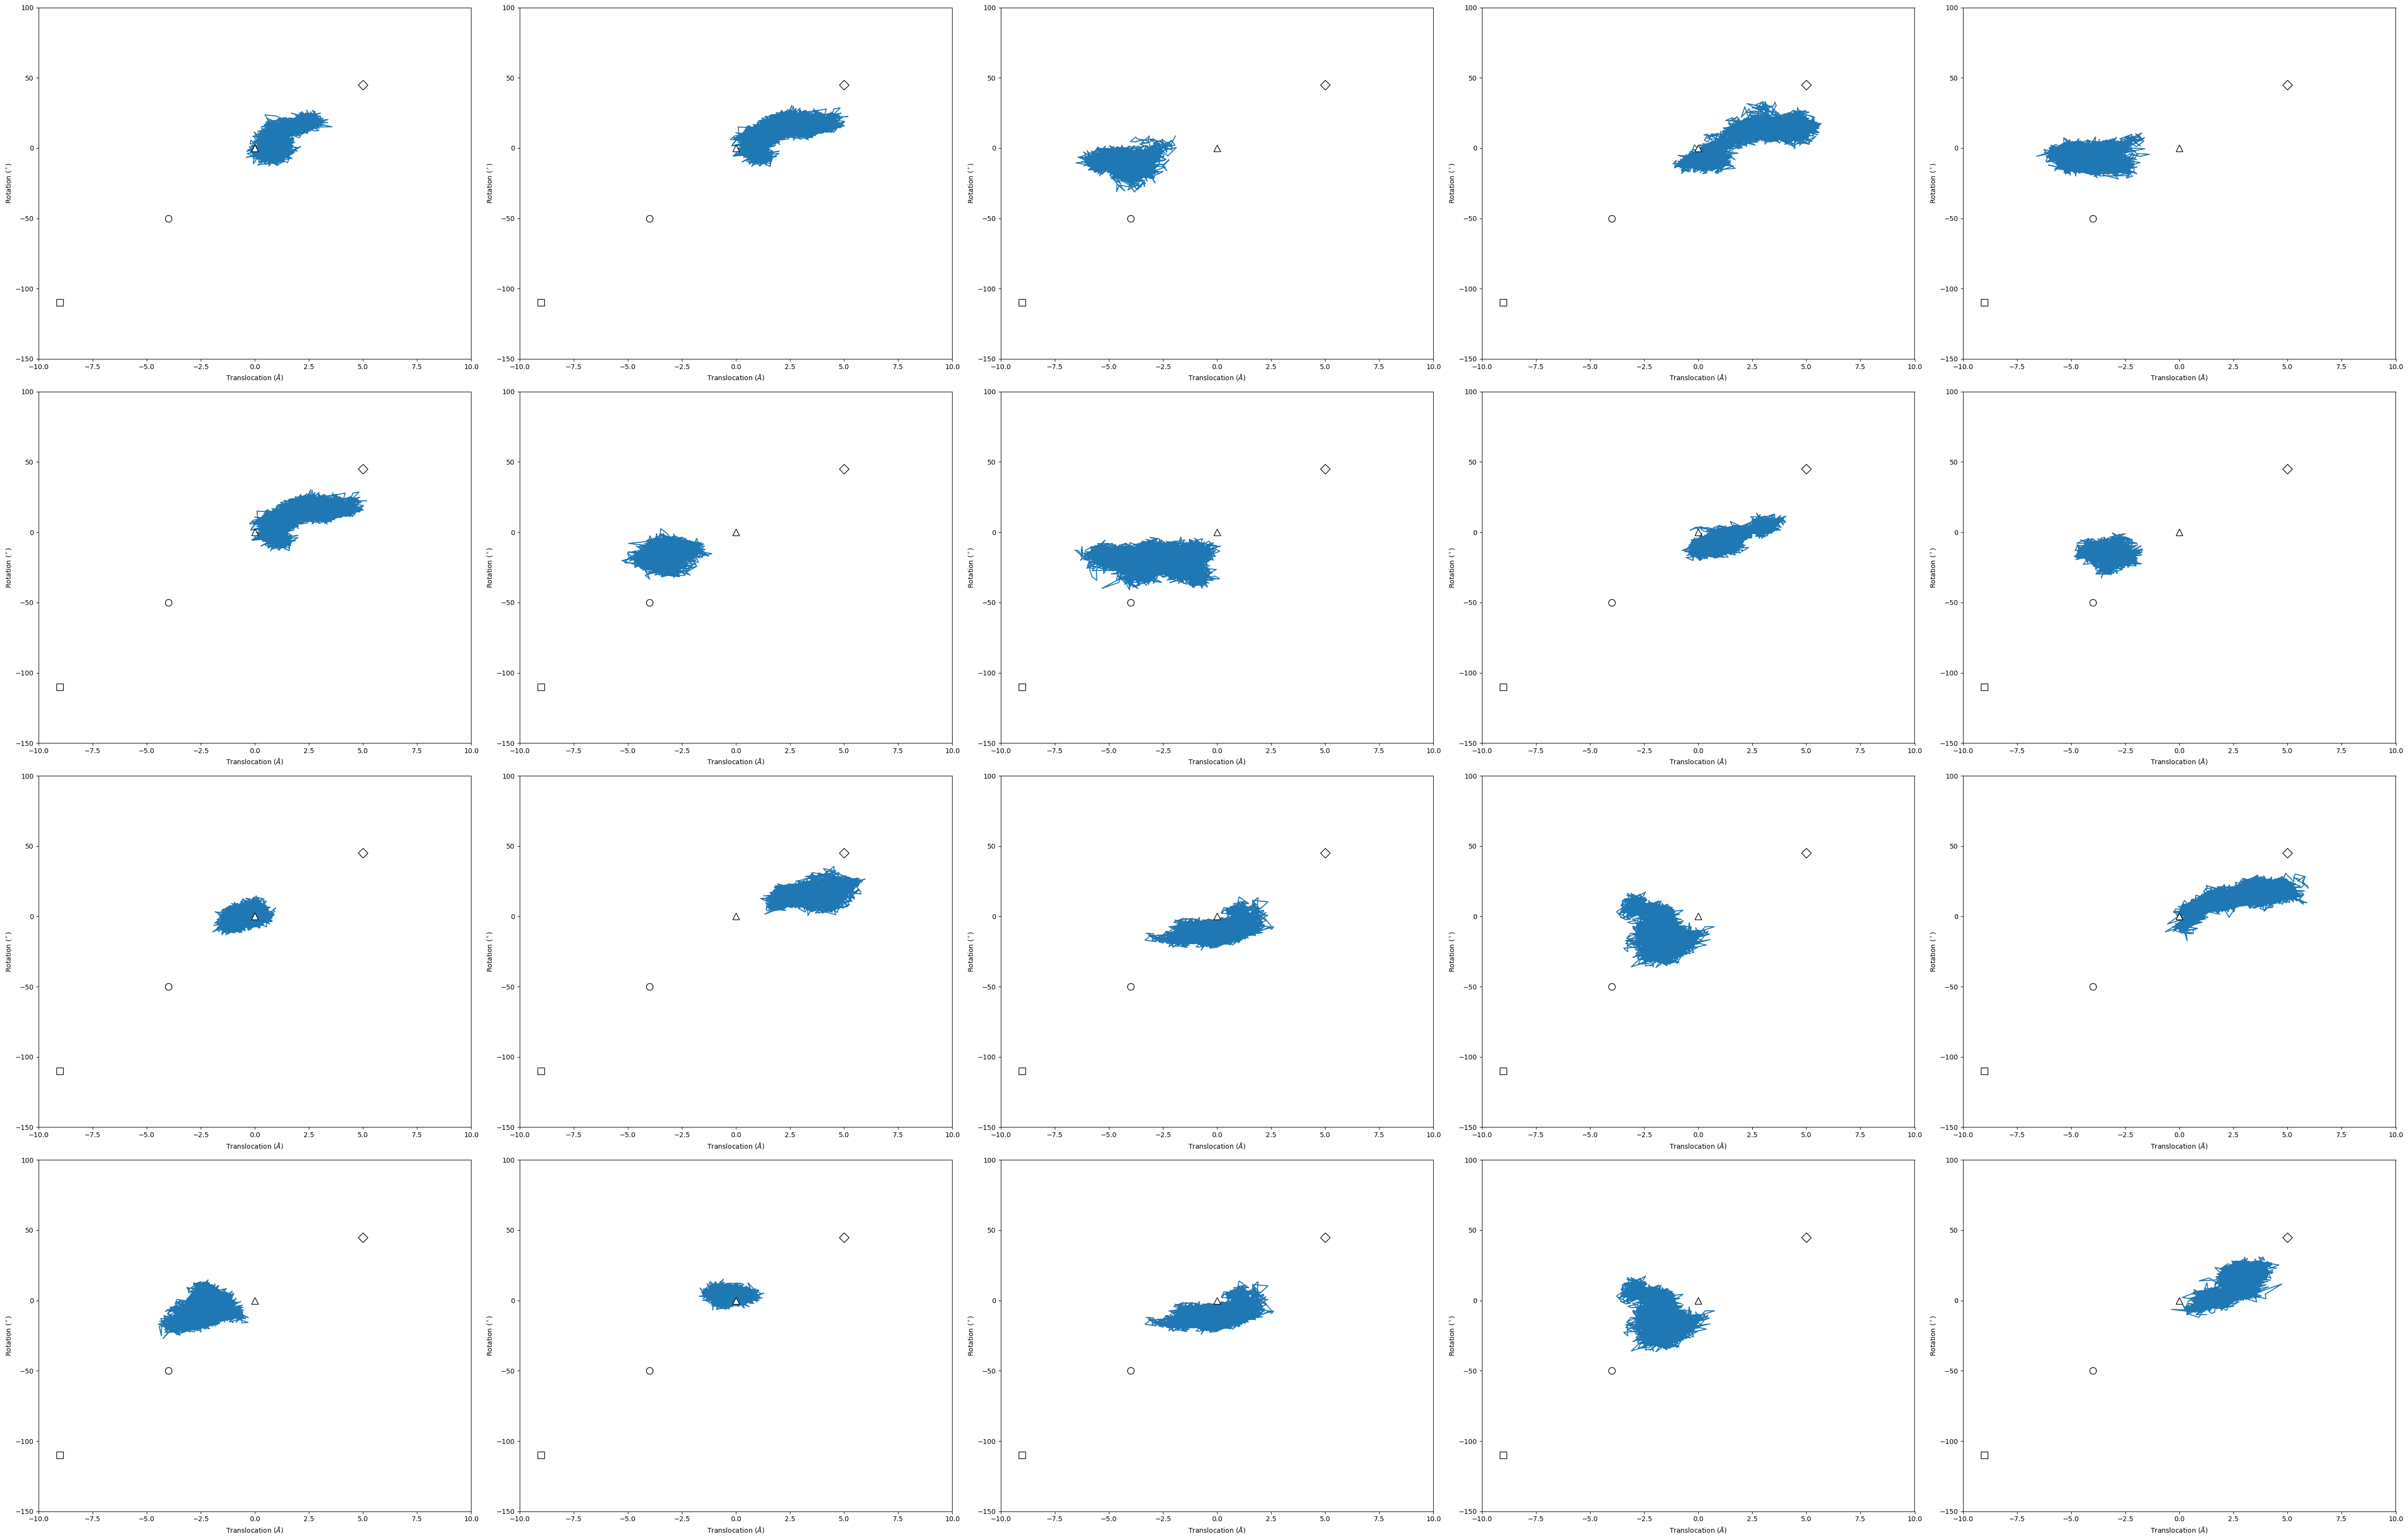

In [46]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1240][:, 0], cv_trajs[i + 1240][:, 1])
    util.format_cvs(ax)

f.tight_layout()

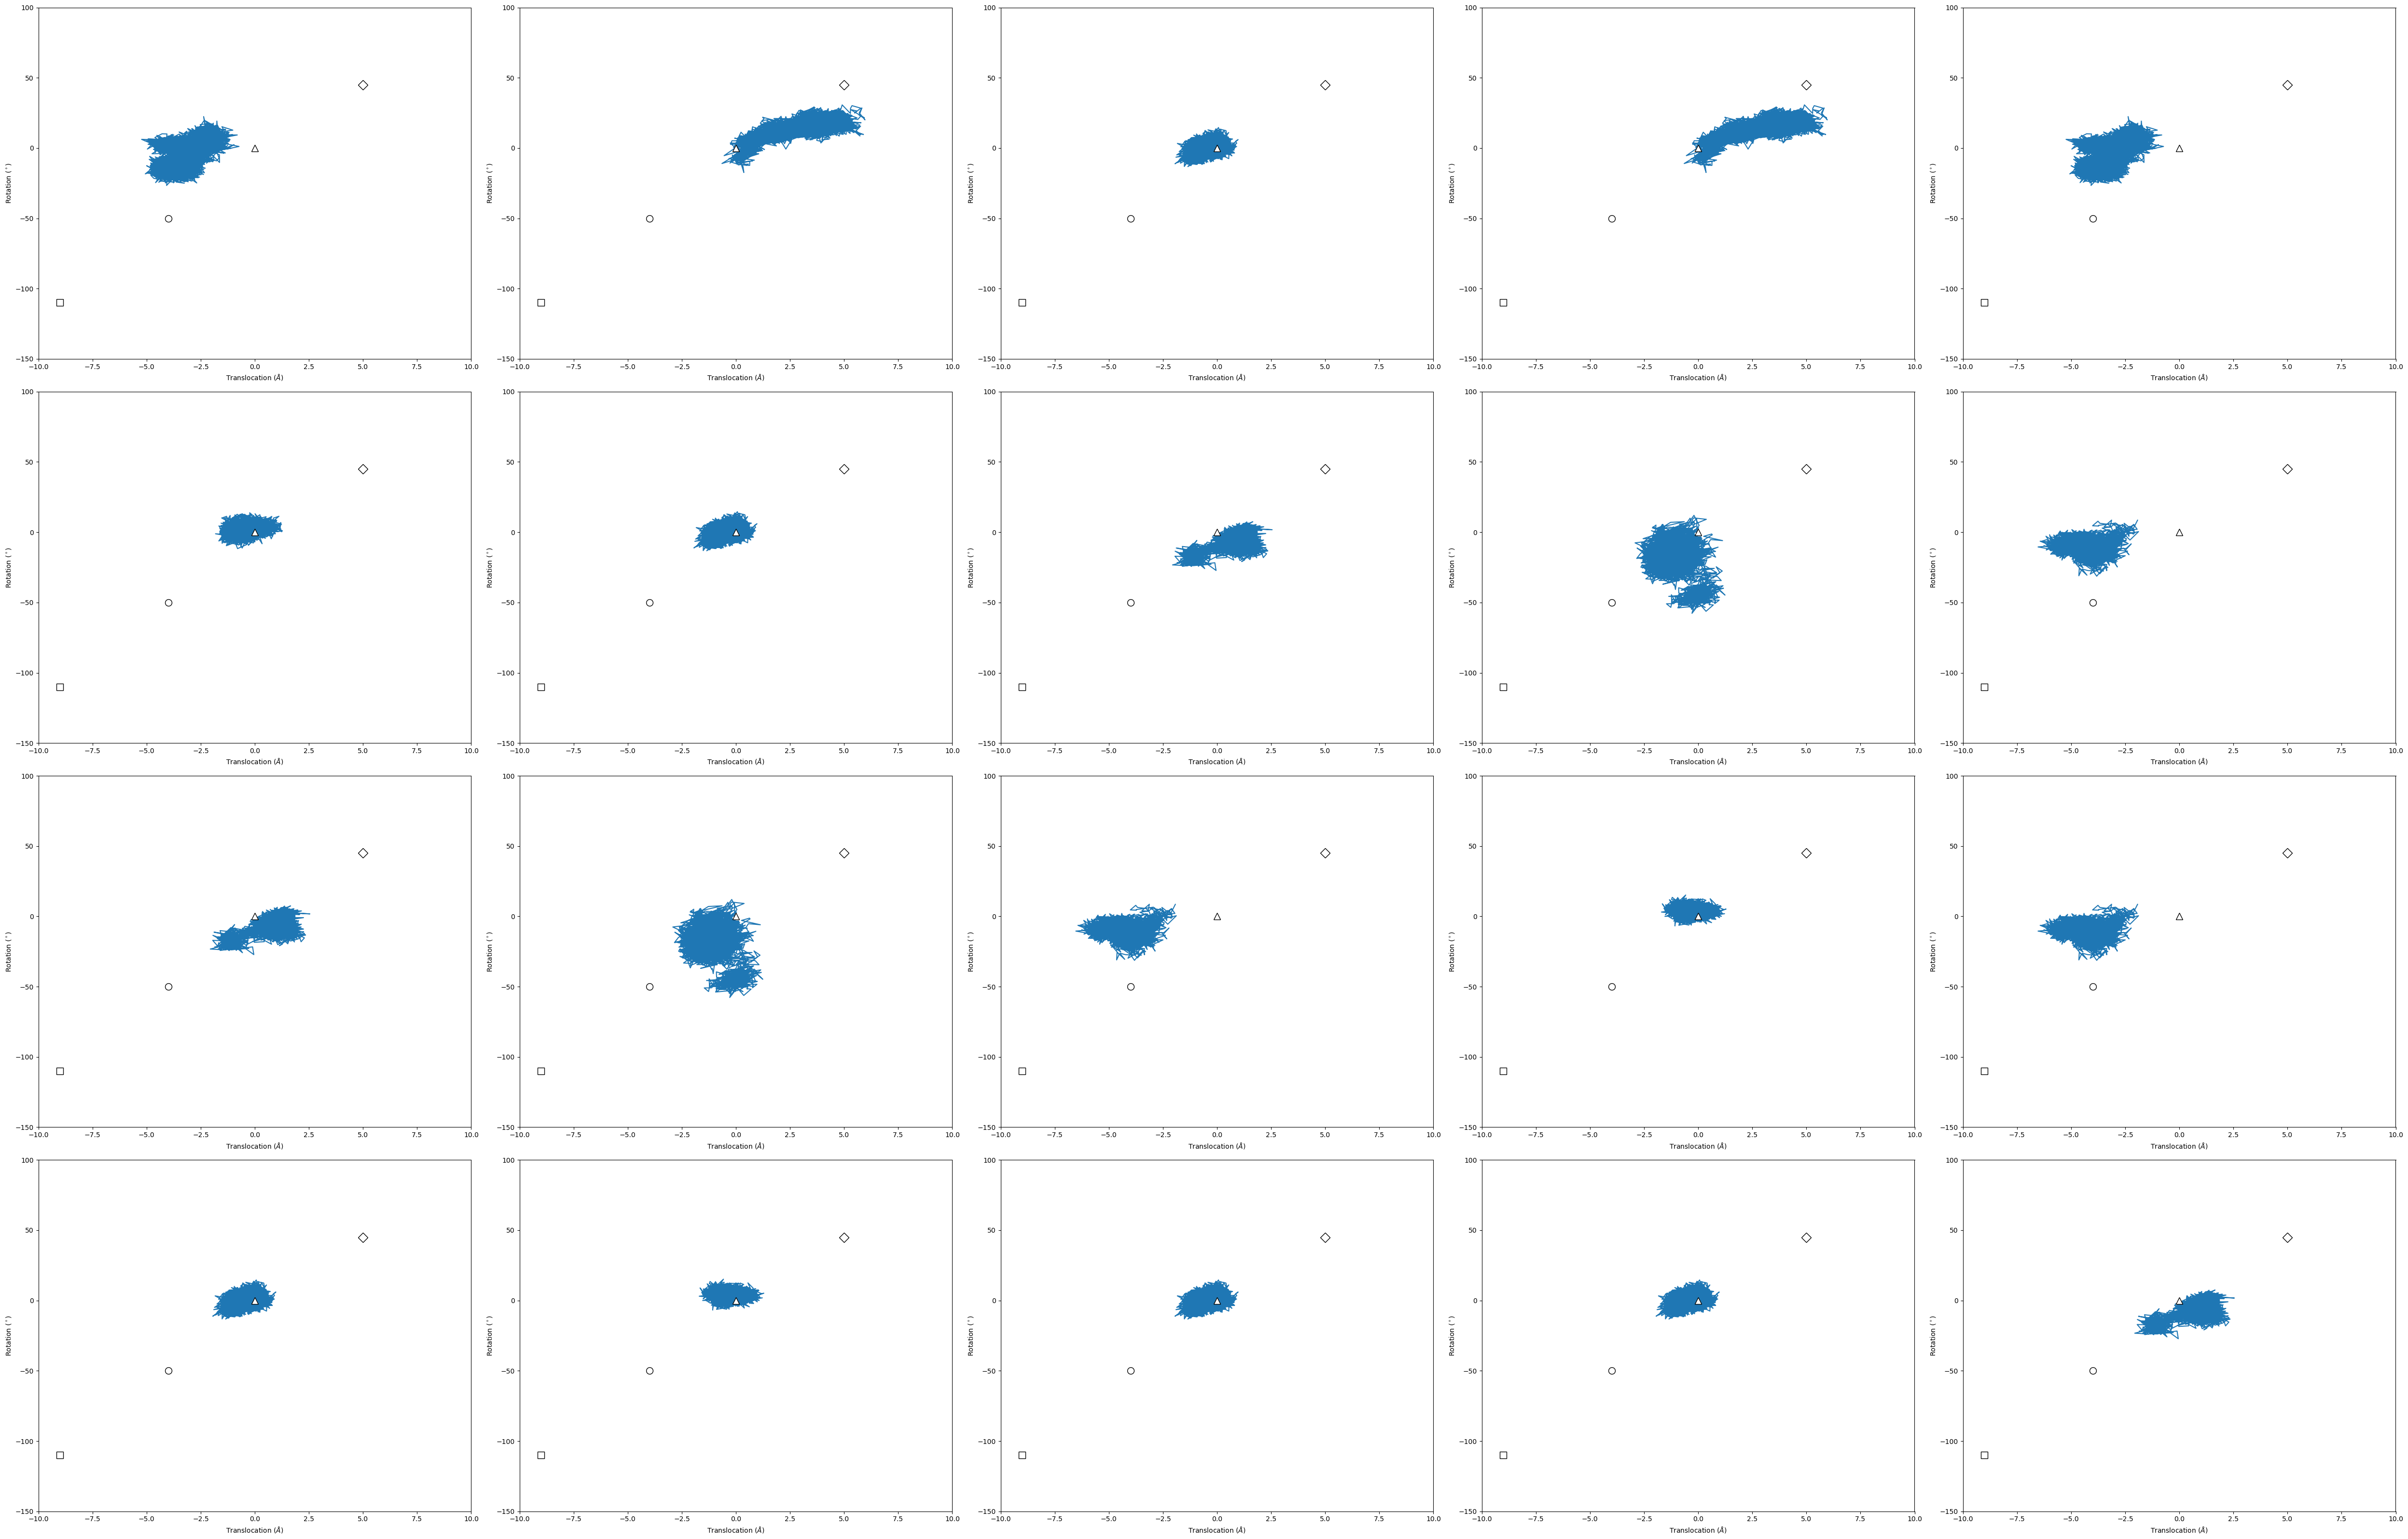

In [47]:
f, axs = plt.subplots(4, 5, figsize=(50, 32))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1260][:, 0], cv_trajs[i + 1260][:, 1])
    util.format_cvs(ax)

f.tight_layout()

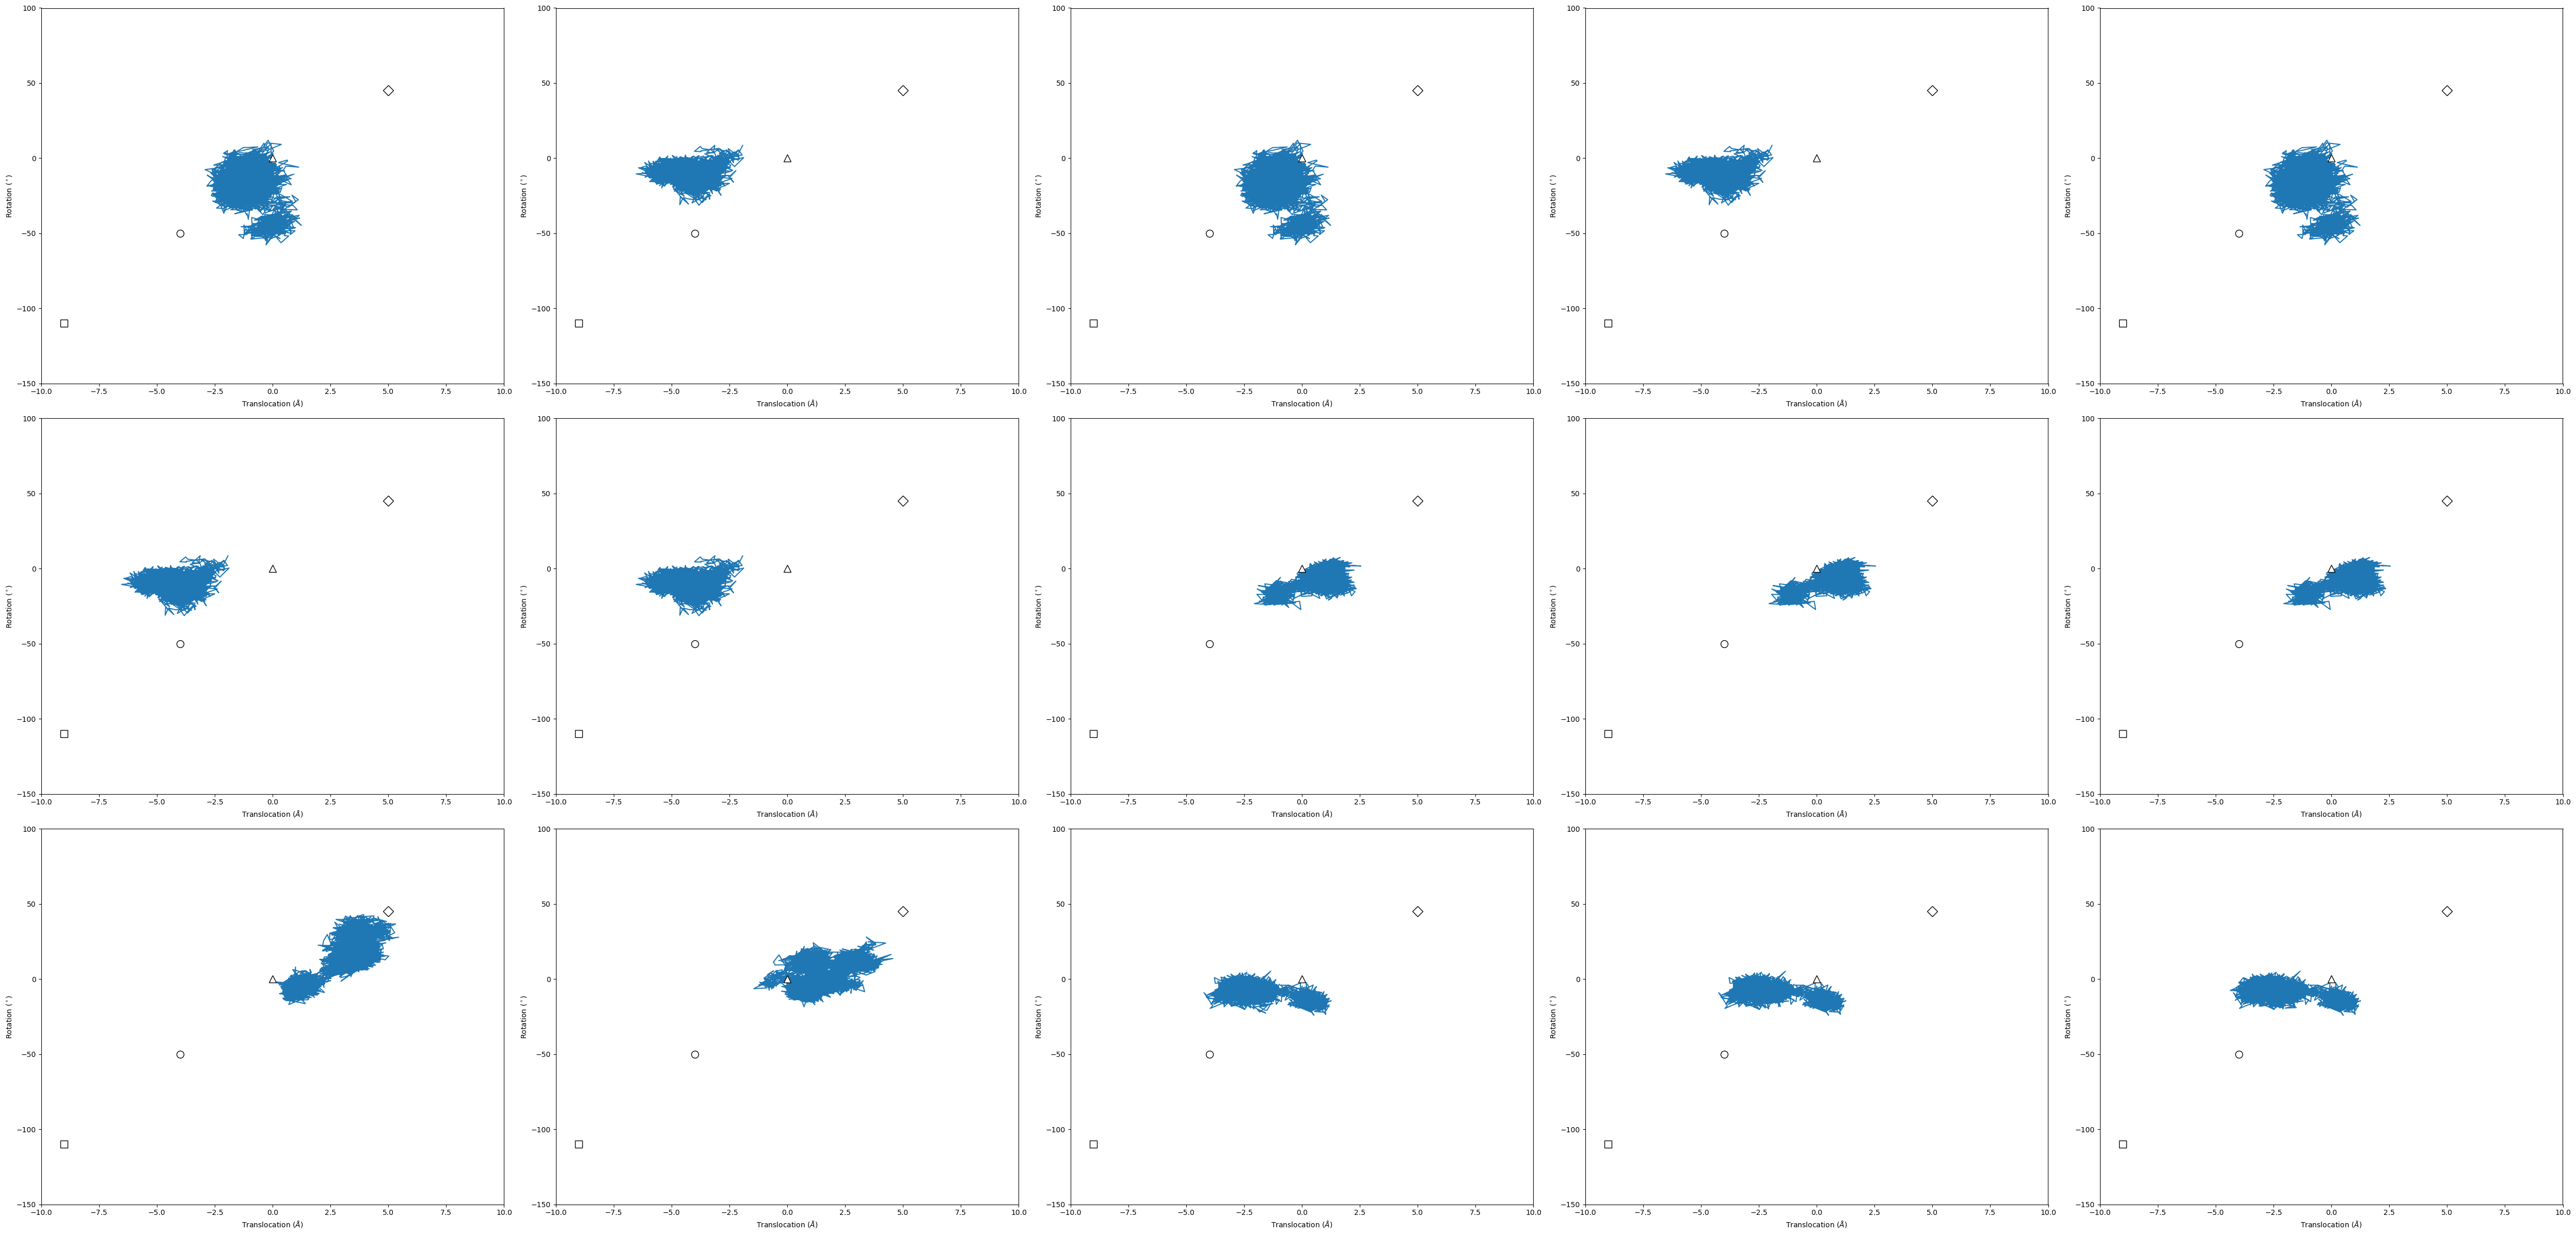

In [43]:
f, axs = plt.subplots(3, 5, figsize=(50, 24))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1280][:, 0], cv_trajs[i + 1280][:, 1])
    util.format_cvs(ax)

f.tight_layout()

## 10 $\mu s$ trajectories

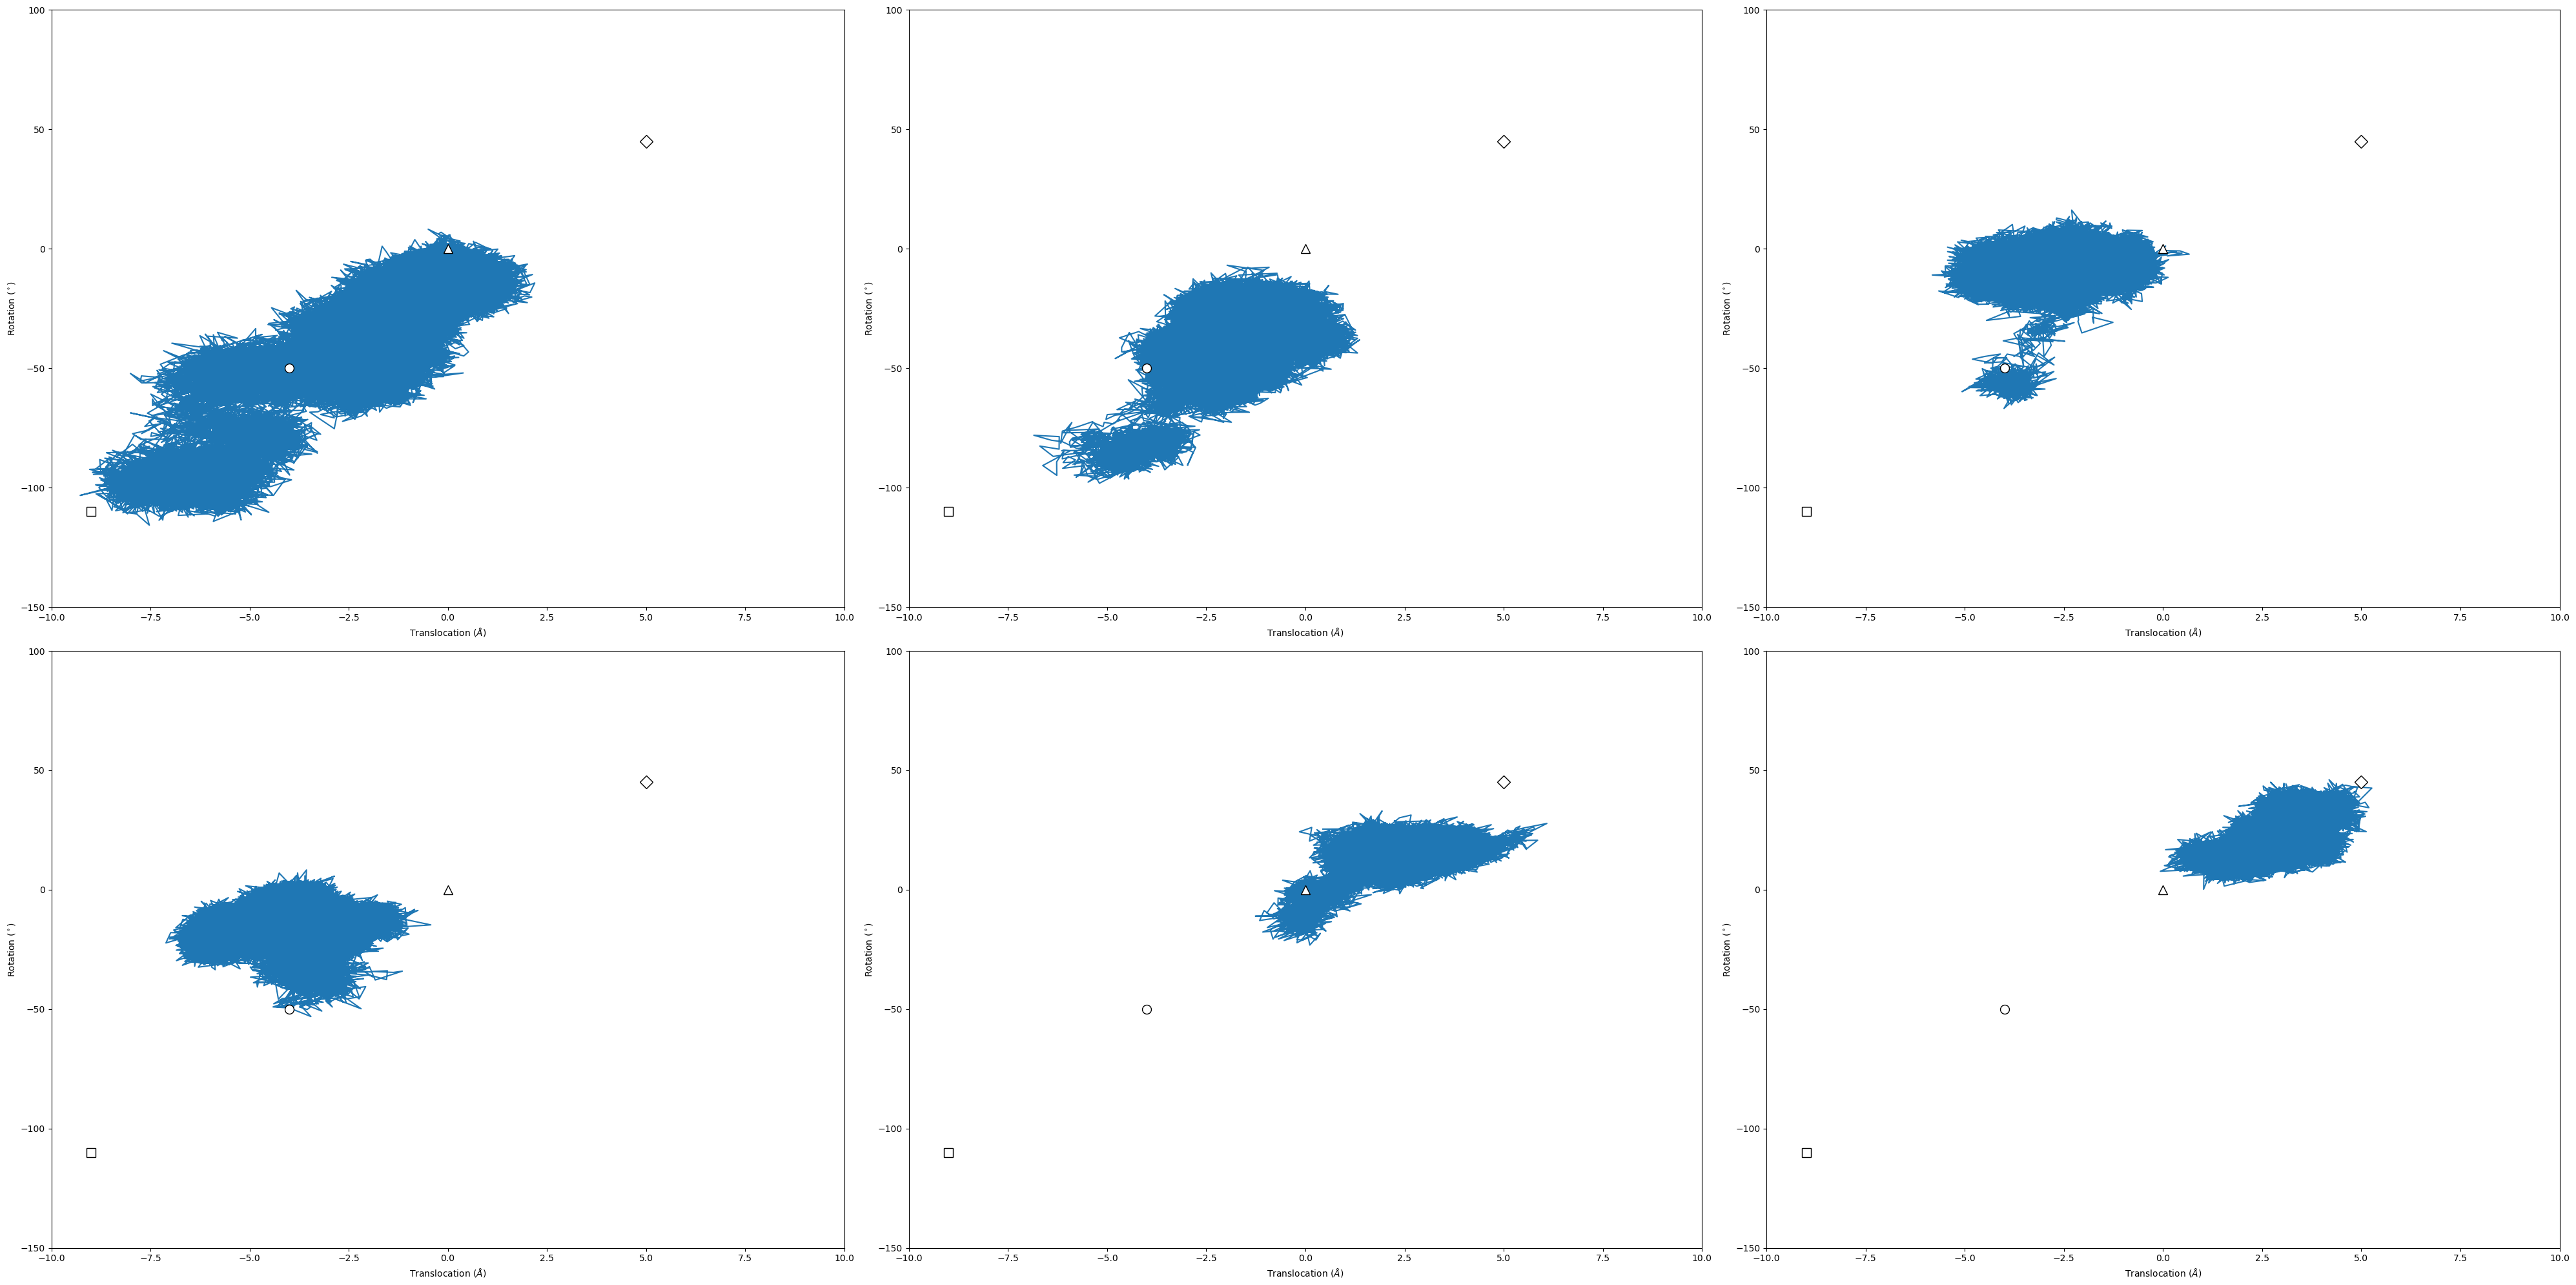

In [59]:
f, axs = plt.subplots(2, 3, figsize=(40, 20))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 1179][:, 0], cv_trajs[i + 1179][:, 1])
    util.format_cvs(ax)

f.tight_layout()

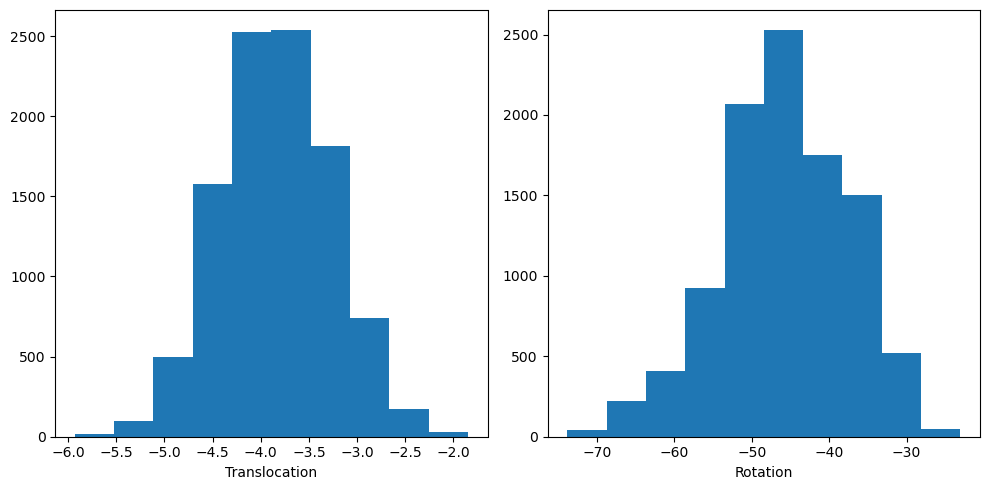

In [36]:
# averages for trajectroy #1003 (appears to be down state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[1003][:, 0])
ax1.hist(cv_trajs[1003][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

In [38]:
print(f"Average translocation: {np.mean(cv_trajs[1003][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1003][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1003][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1003][:,1])}")

Average translocation: -3.8361585841415855
Stdev translocation:   0.5743570717280068
Average rotation:      -45.72832946705329
Stdev rotation:        8.210557239975952


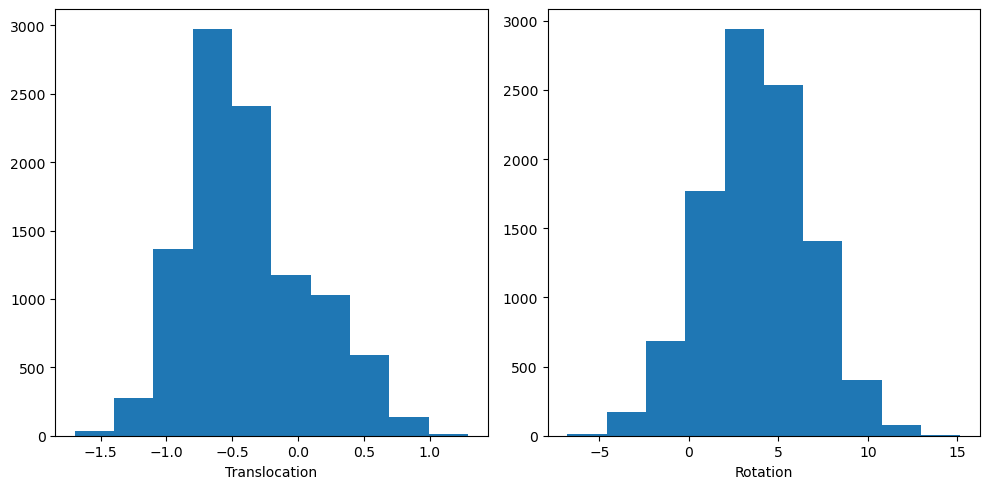

In [40]:
# averages for trajectroy #1211 (appears to be up state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[1211][:, 0])
ax1.hist(cv_trajs[1211][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

In [41]:
print(f"Average translocation: {np.mean(cv_trajs[1211][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1211][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1211][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1211][:,1])}")

Average translocation: -0.3838306169383061
Stdev translocation:   0.45960038278413545
Average rotation:      3.780801419858015
Stdev rotation:        2.9072443799882883


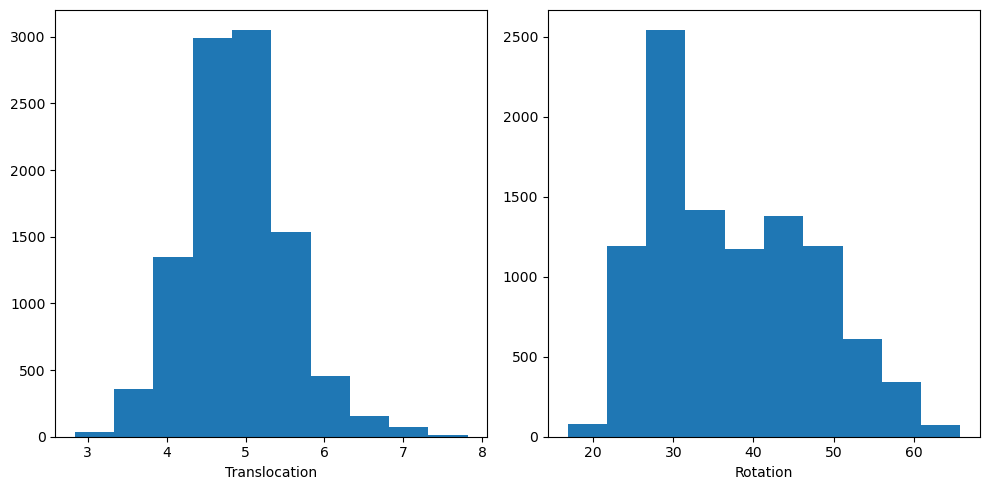

In [55]:
# averages for trajectroy #1043 (appears to be up+ state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[1043][:, 0])
ax1.hist(cv_trajs[1043][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

In [56]:
print(f"Average translocation: {np.mean(cv_trajs[1043][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1043][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1043][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1043][:,1])}")

Average translocation: 4.89496900309969
Stdev translocation:   0.6320511629384435
Average rotation:      37.37871852814718
Stdev rotation:        9.871899834481276


# Check trajectories for ABMD

4.9.21

In [3]:
sys.path.insert(1, "../../python/")
import util

In [4]:
ds_trajs = util.load_ds_trajs()

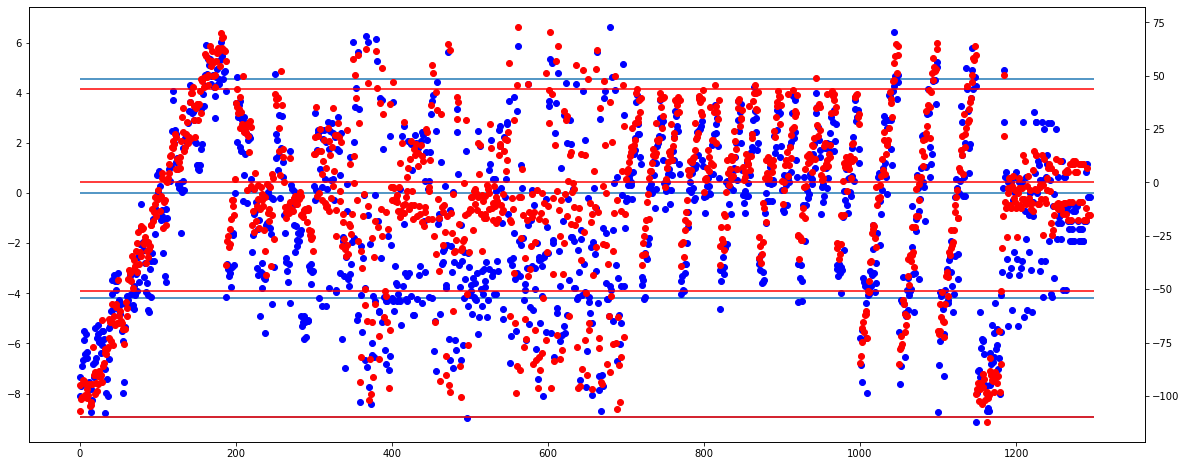

In [5]:
inits = np.asarray([traj[0, :] for traj in ds_trajs])

f = plt.figure(figsize=(20, 8))

plt.plot(inits[:, 0], "bo")
plt.hlines([-8.919, -4.174, 0, 4.535], 0, 1300)
plt.twinx()
plt.plot(inits[:, 1], "ro")
plt.hlines([-109.9, -50.9, 0, 43.7], 0, 1300, colors="r")

In [6]:
with open("../../scripts/ds-models.txt") as f:
    points = np.loadtxt(f)

In [7]:
points

array([[  -8.919, -109.854],
       [  -4.174,  -50.788],
       [   0.   ,    0.   ],
       [   4.535,   43.73 ]])

## down minus state 

In [15]:
dist = np.linalg.norm(inits - points[0], axis=1)

In [16]:
print(dist)

[ 2.9468887  15.07284157  8.44896307 ... 95.15940108 95.15940108
 95.15940108]


In [17]:
print(dist.argsort())

[1162    0  689 ...  181  603  562]


In [39]:
# trajectory 1162 should be nearest down- state
inits[1162]

array([  -8.702, -112.248])

In [18]:
inits[0]

array([  -8.087, -107.027])

## up plus state 

In [19]:
dist2 = np.linalg.norm(inits - points[3], axis=1)

In [20]:
print(dist2)

[151.28446032 139.10226334 145.73773833 ...  59.01541216  59.01541216
  59.01541216]


In [21]:
print(dist2.argsort())

[ 714  914  381 ...  689    0 1162]


In [42]:
# trajectory 714 should be nearst up plus state
inits[714]

array([ 3.911, 43.766])

In [44]:
inits[914]

array([ 3.856, 43.432])

In [22]:
inits[381]

array([ 5.256, 44.036])

## down/up

In [10]:
inits.shape

(1295, 2)

In [17]:
centroids = np.loadtxt("../../models/MD-clustering-center/all.txt")

In [11]:
dist = np.linalg.norm(inits[:1000] - points[1], axis=1)
print(dist.argsort())
dist2 = np.linalg.norm(inits[:1000] - points[2], axis=1)
print(dist2.argsort())

[365  68 391 681 392 649  66 496  49  64  59  62 594  46  41 378 366 575
  47 658 239  60 606  65 619 557  73  52  63 460 479  70 577 362  71 771
  50 678  61  44 245 627 188 721 552 820 390 677 690  76  85 873 571  38
  29  53  69 368  42 455  39 394 374 643 558 652 973 922  54  48 871  51
 570 774  88 377  45 341  67  79 720 974 724 344 874 457  55 480  58  77
  56 499 653 583 599 481 360 398 516 299  72 237  86 683 825  89 488 340
 971 490 191 612 661 336 872 383  90 821 578 674 465 697  83 343 975 193
 770 972 671 722  37 665 621 970 772  74 584 572  87 875  82 824 773 597
 648 189 491 356  40 924 482 925 296 339 687 493 249 823 375 566  57 298
 923 684 497  84  43 870 190 920 387 454 615 329 723 921 569 637 295  17
  36 348 477 666  35 646 224  75  32 618 297 468 294 236 775 504 192  80
 592 395  33 725 107 822  81 230 829  34 382 347  78 469 441 110  91 635
  92 361 221 588 694 345 630 486 616 384 779 372 655 291 533 337 439 553
 585 879  94 379 608 226 596 243 551 530 573 776 72

In [16]:
inits[111]

array([-0.649,  0.751])

In [15]:
inits[68]

array([ -4.467, -49.647])

In [19]:
dist = np.linalg.norm(inits[:1000] - centroids[1], axis=1)
print(dist.argsort()[:10])
dist2 = np.linalg.norm(inits[:1000] - centroids[2], axis=1)
print(dist2.argsort()[:10])

[378  41  46  59  47  60 366  52 681 479]
[247 881 950 106 225 257 781 887 311 831]


In [22]:
centroids

array([[  -7.863, -108.573],
       [  -4.24 ,  -56.95 ],
       [  -0.506,    3.94 ],
       [   6.447,   60.713]])

In [21]:
inits[41]

array([ -4.021, -57.077])

In [24]:
inits[106]

array([-0.903,  4.184])